In [2]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from utils import load_datasets
plt.rcParams['axes.linewidth']= 3.
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (16,16)

In [3]:
def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 1000
    n = len(dset2)
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up

In [4]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

/scratch/lzanisi/pixel-cnn/analysis/utils.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  SDSS['LCentSat'] = SDSS['LCentSat'].replace(to_replace=2, value=0)


In [5]:
blobs = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/DataFrames_LLR/blobs_Rot_blobsLike_0.03_0.055_new.csv')
blobs_train = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/DataFrames_LLR/blobs_Rot_blobsLike_0.03_0.055_train_new.csv')
SDSS_train = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/DataFrames_LLR/SDSS_Rot_blobsLike_train_new.csv')

In [6]:
SDSS_cen = SDSS.query('LCentSat==1')
TNG_cen = TNG.query('LCentSat==1')
TNG50_cen = TNG50.query('LCentSat==1')
Illustris_cen = Illustris.query('LCentSat==1')

SDSS_sat = SDSS.query('LCentSat==0')
TNG_sat = TNG.query('LCentSat==0')
TNG50_sat = TNG50.query('LCentSat==0')
Illustris_sat = Illustris.query('LCentSat==0')

SDSS_Q = SDSS.query('sSFR<-11')
SDSS_SF = SDSS.query('sSFR>-11')

TNG_Q = TNG.query('sSFR<-11')
TNG_SF = TNG.query('sSFR>-11')

TNG50_Q = TNG50.query('sSFR<-11')
TNG50_SF = TNG50.query('sSFR>-11')

Illustris_Q = Illustris.query('sSFR<-11')
Illustris_SF = Illustris.query('sSFR>-11')


SDSS_cen_Q = SDSS_cen.query('sSFR<-11') #ToDo: TNG50 SF & Q; cen & sat
TNG_cen_Q = TNG_cen.query('sSFR<-11')
TNG50_cen_Q = TNG50_cen.query('sSFR<-11')
Illustris_cen_Q = Illustris_cen.query('sSFR<-11')

SDSS_sat_Q = SDSS_sat.query('sSFR<-11')
TNG_sat_Q = TNG_sat.query('sSFR<-11')
TNG50_sat_Q = TNG50_sat.query('sSFR<-11')
Illustris_sat_Q = Illustris_sat.query('sSFR<-11')

SDSS_cen_SF = SDSS_cen.query('sSFR>-11')
TNG_cen_SF = TNG_cen.query('sSFR>-11')
TNG50_cen_SF = TNG50_cen.query('sSFR>-11')
Illustris_cen_SF = Illustris_cen.query('sSFR>-11')

SDSS_sat_SF = SDSS_sat.query('sSFR>-11')
TNG_sat_SF = TNG_sat.query('sSFR>-11')
TNG50_sat_SF = TNG50_sat.query('sSFR>-11')
Illustris_sat_SF = Illustris_sat.query('sSFR>-11')

# investigate behaviour of bootstrapped distributions 

In [42]:
def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 500
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        elif choice=='all':
            pass
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)

fig, ax = plt.subplots(3,3, figsize=(48,48))
bins=np.arange(10,170,1)
for dset,(lab,col,a) in  zip([SDSS.query('LLR<500'),TNG, Illustris], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[0].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='all')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step', label=lab)
    a.set_title(lab)
for dset,(lab,col,a) in  zip([SDSS.query('LLR<500'),TNG, Illustris], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[1].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='Q')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step')
    
for dset,(lab,col,a) in  zip([SDSS.query('LLR<500'),TNG, Illustris], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[2].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='SF')
    a.hist(boot,bins=30, lw=6, ls=ls, color=col,histtype='step')
    
fig.subplots_adjust(left=0.05, right=0.8)
fig.text(0.82,0.75,'All')
fig.text(0.82,0.5, 'Quiescent')
fig.text(0.82,0.25, 'Star forming')

Text(0.82, 0.25, 'Star forming')

Text(0.82, 0.25, 'Star forming')

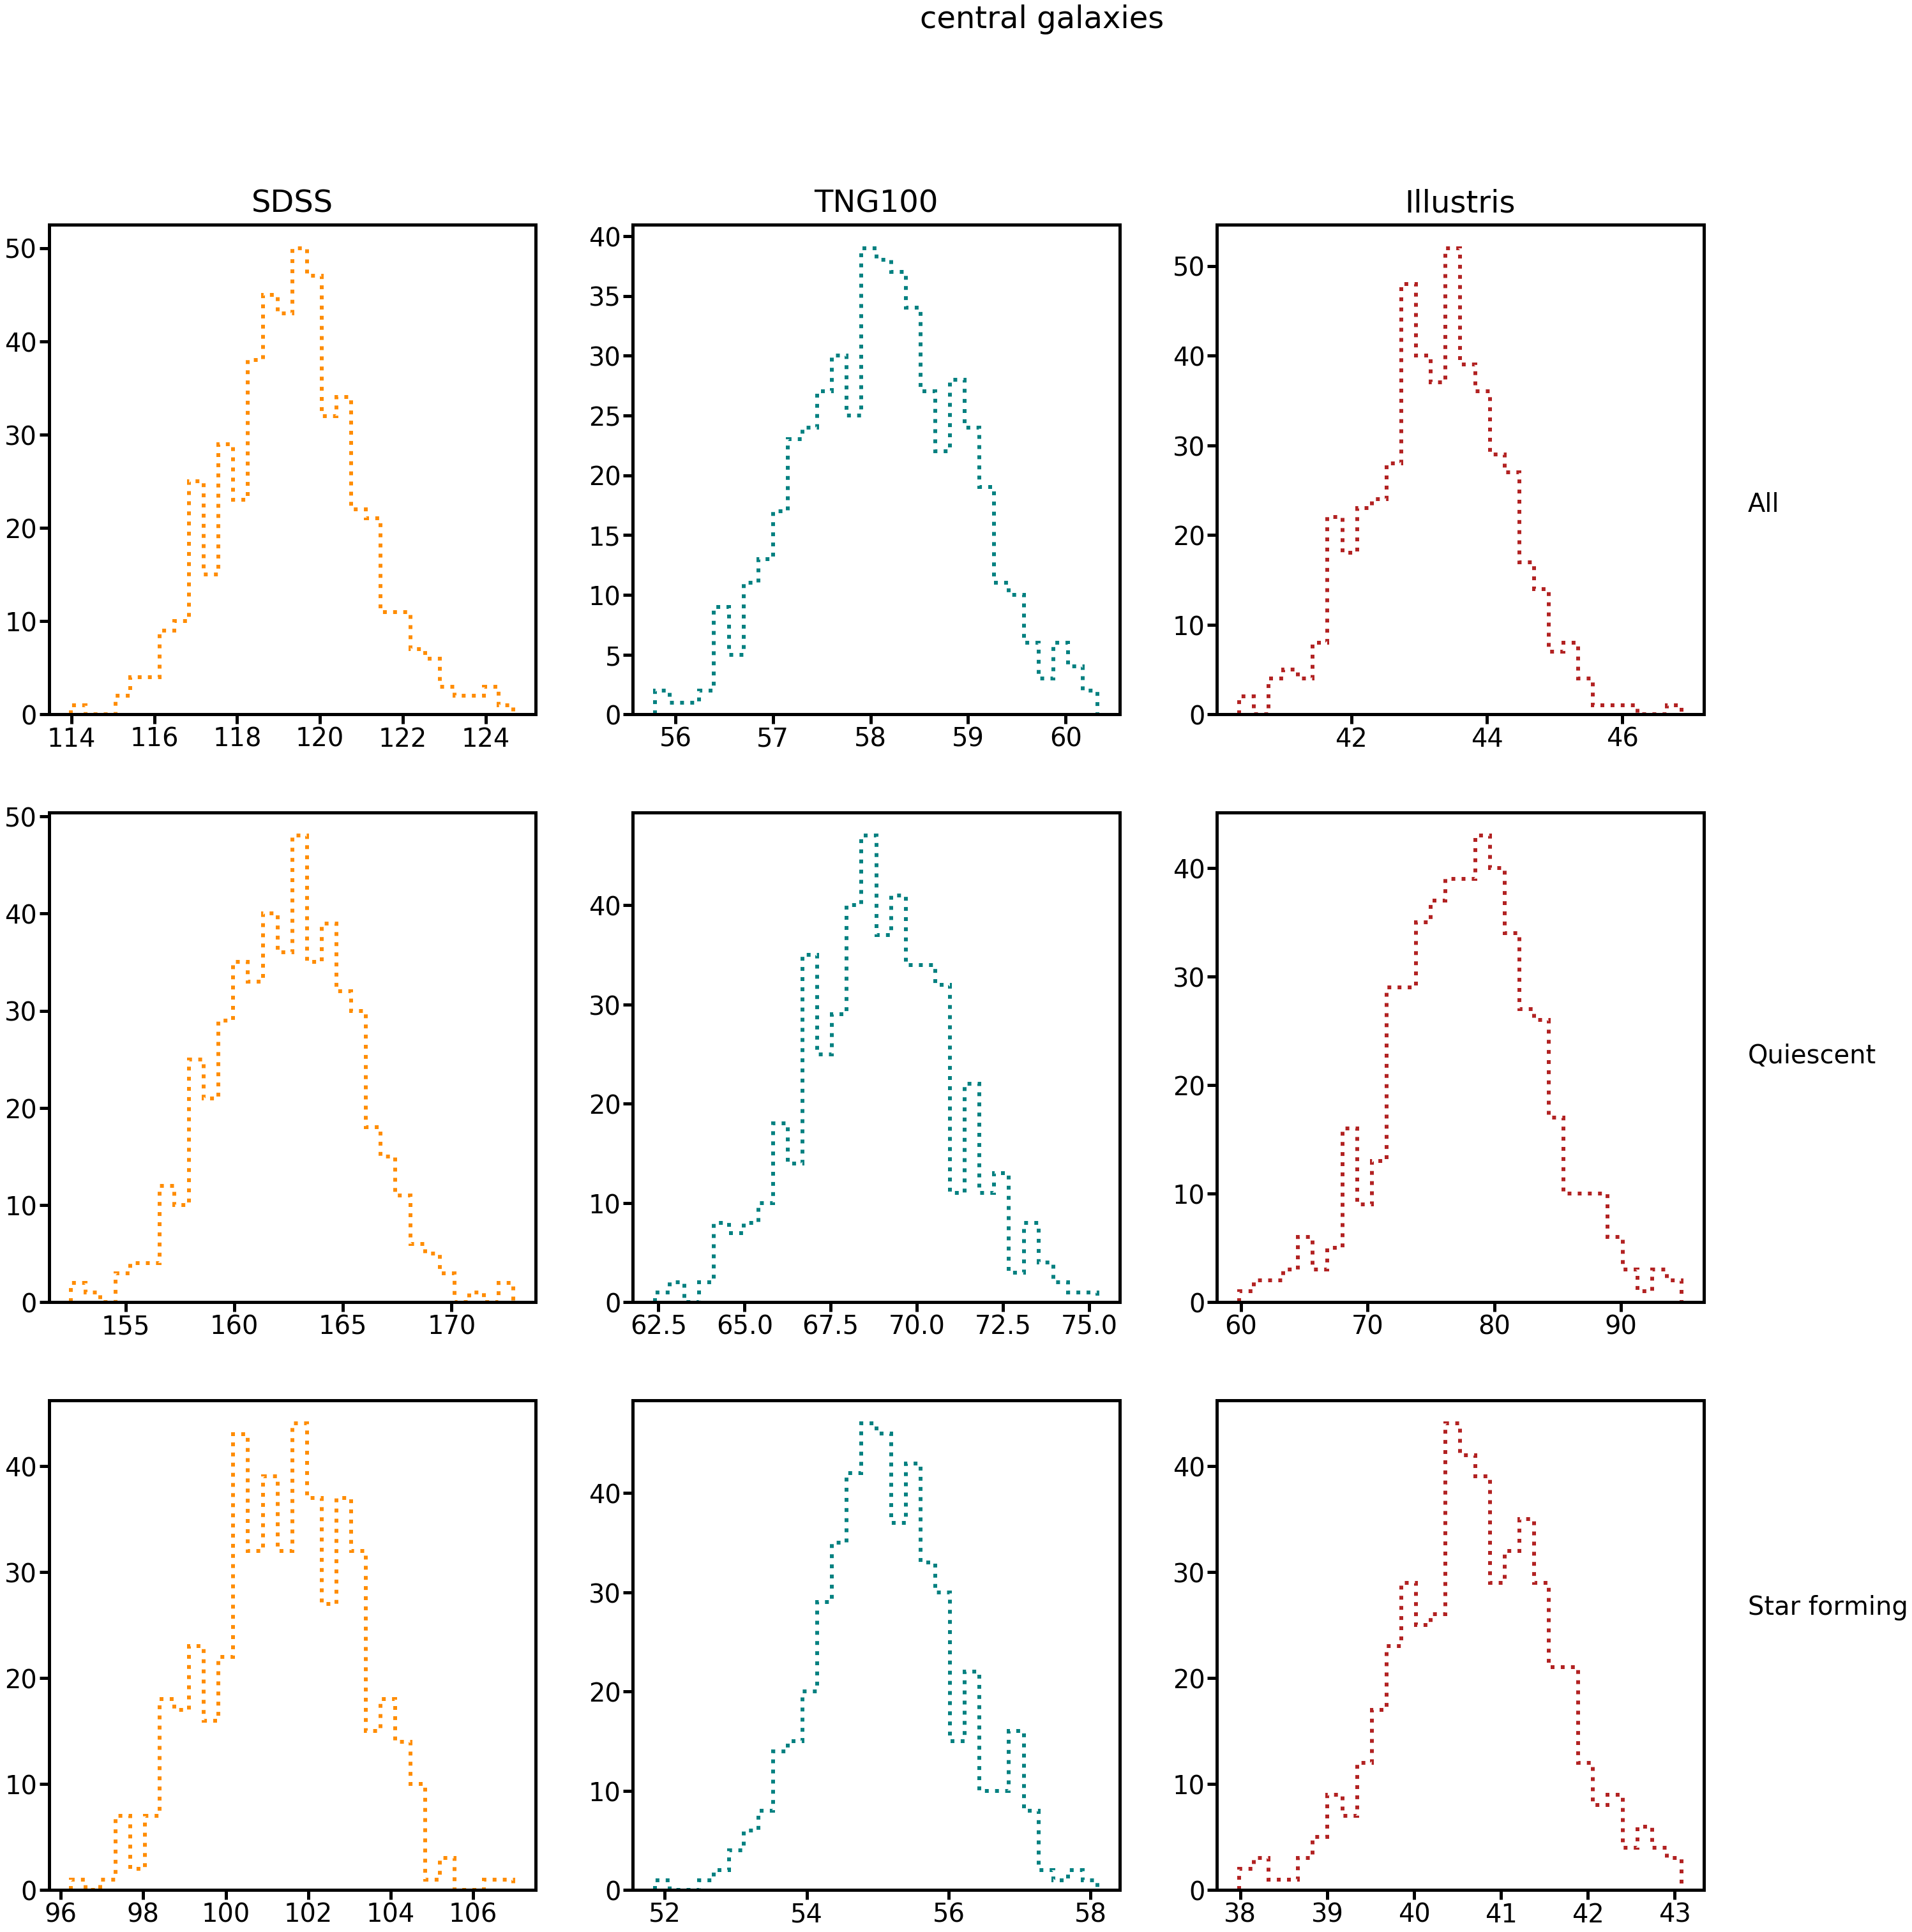

In [43]:
fig, ax = plt.subplots(3,3, figsize=(48,48))
bins=np.arange(10,170,1)
for dset,(lab,col,a) in  zip([SDSS_cen.query('LLR<500'),TNG_cen, Illustris_cen], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[0].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='all')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step', label=lab)
    a.set_title(lab)
for dset,(lab,col,a) in  zip([SDSS_cen.query('LLR<500'),TNG_cen, Illustris_cen], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[1].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='Q')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step')
    
for dset,(lab,col,a) in  zip([SDSS_cen.query('LLR<500'),TNG_cen, Illustris_cen], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[2].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='SF')
    a.hist(boot,bins=30, lw=6, ls=ls, color=col,histtype='step')
    
fig.suptitle('central galaxies')
fig.subplots_adjust(left=0.05, right=0.8)
fig.text(0.82,0.75,'All')
fig.text(0.82,0.5, 'Quiescent')
fig.text(0.82,0.25, 'Star forming')

Text(0.82, 0.25, 'Star forming')

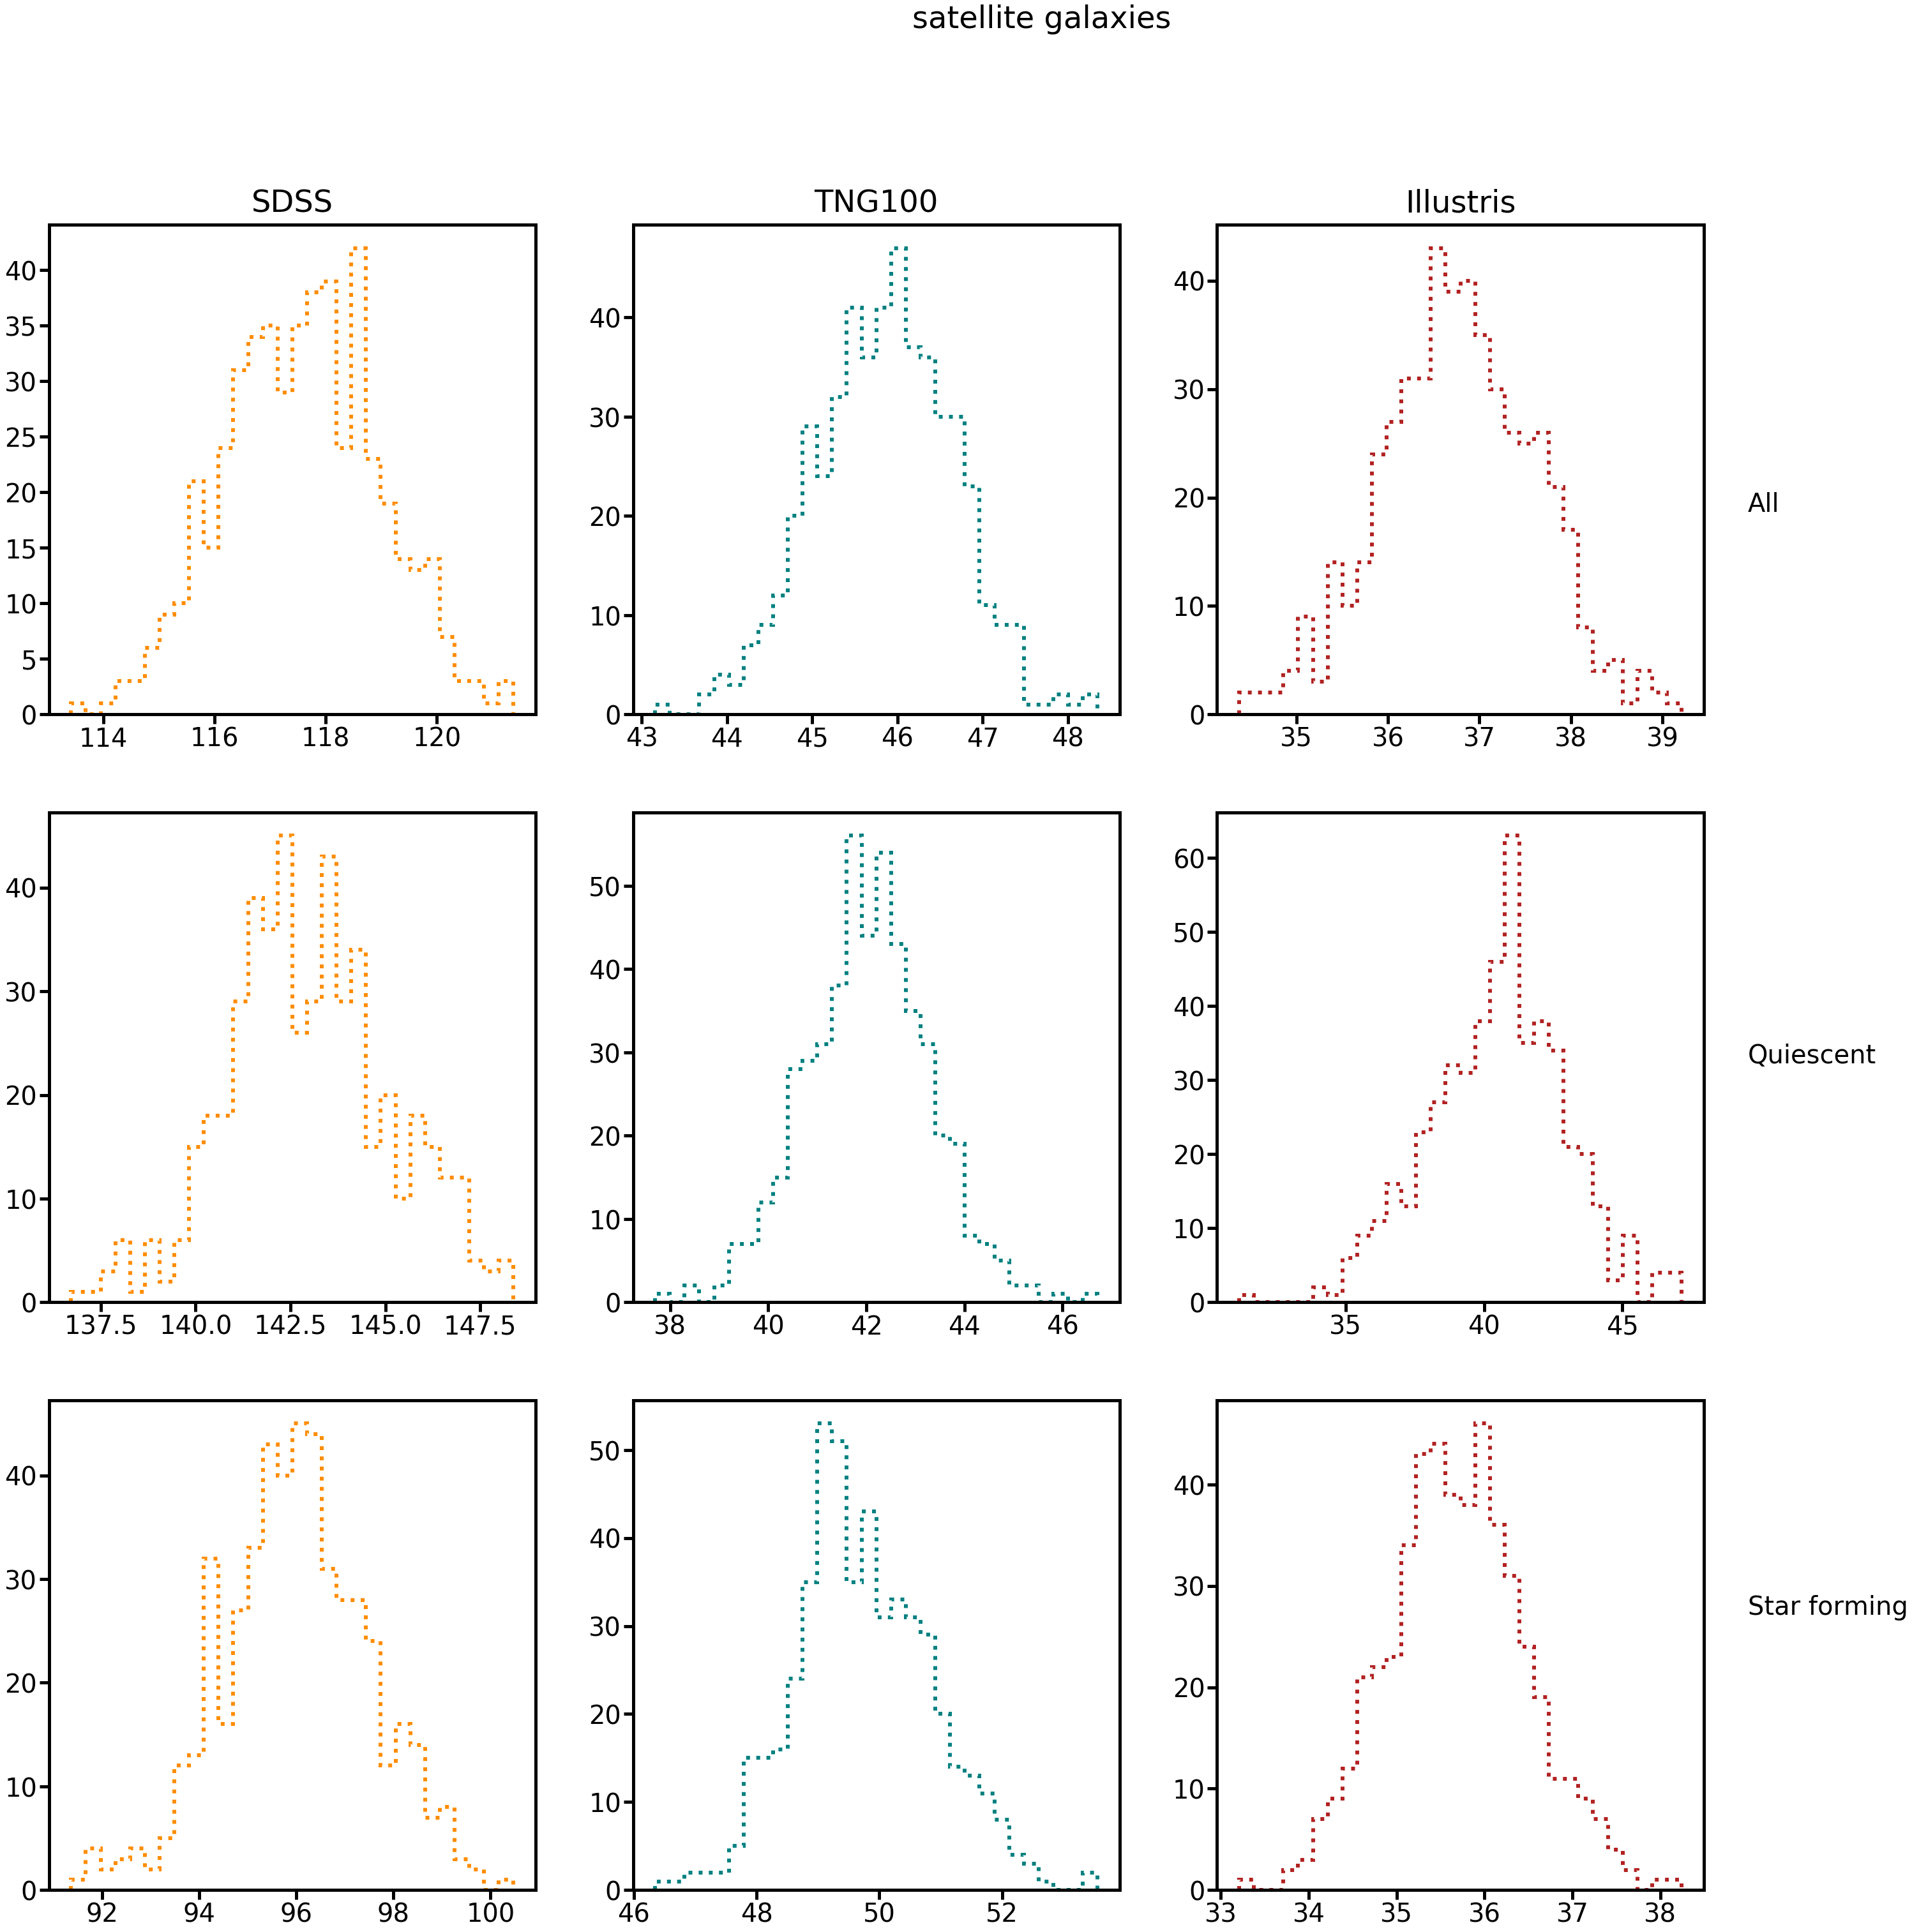

In [44]:
fig, ax = plt.subplots(3,3, figsize=(48,48))
bins=np.arange(10,170,1)
for dset,(lab,col,a) in  zip([SDSS_sat.query('LLR<500'),TNG_sat, Illustris_sat], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[0].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='all')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step', label=lab)
    a.set_title(lab)
for dset,(lab,col,a) in  zip([SDSS_sat.query('LLR<500'),TNG_sat, Illustris_sat], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[1].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='Q')
    a.hist(boot,bins=30, lw=6, ls=ls,color=col, histtype='step')
    
for dset,(lab,col,a) in  zip([SDSS_sat.query('LLR<500'),TNG_sat, Illustris_sat], zip(['SDSS','TNG100','Illustris'],\
                                     ['darkorange','teal','firebrick'], ax[2].ravel())):
    
    _,_,_, boot = make_bootstrap(dset,TNG50, choice='SF')
    a.hist(boot,bins=30, lw=6, ls=ls, color=col,histtype='step')
    
fig.suptitle('satellite galaxies')
fig.subplots_adjust(left=0.05, right=0.8)
fig.text(0.82,0.75,'All')
fig.text(0.82,0.5, 'Quiescent')
fig.text(0.82,0.25, 'Star forming')

# The bootrstrapped means are very reasonably gaussian in most cases. 
### The variance in the difference of the means is the sum in quadrature of the variances.

In [12]:

bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 1000
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        elif choice=='all':
            pass
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, ax = plt.subplots(1,1,  figsize=(16,16))

ys = 0.015
ax.text(120,ys,r'$\Delta \langle LLR \rangle$=')
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris, blobs], zip(['SDSS','TNG50','TNG100','Illustris','Sersic'],\
                                     ['darkorange','magenta','teal','firebrick','lime'],['moccasin','none','cyan','salmon','lime'],\
                                        ['-','-.','--',':','-'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='all')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50['LLR'],bins=bins, density=True)[0]
        ax.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
    elif lab=='Sersic':
        x = -blobs['LLR']
        h = np.histogram(x,bins=bins, density=True)[0]
        ax.plot(bins[1:],h,lw=5, color='lime',label='Sersic',  dashes=[5,2,15,2])
        
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax.legend(frameon=False, fontsize=45)

ax.set_xlabel('LLR')
ax.set_ylabel('#')


fig.tight_layout()

#fig.savefig('./results/LLR_L_trends/LLR__1sigma.pdf')

# star forming/ quiescent

here
here


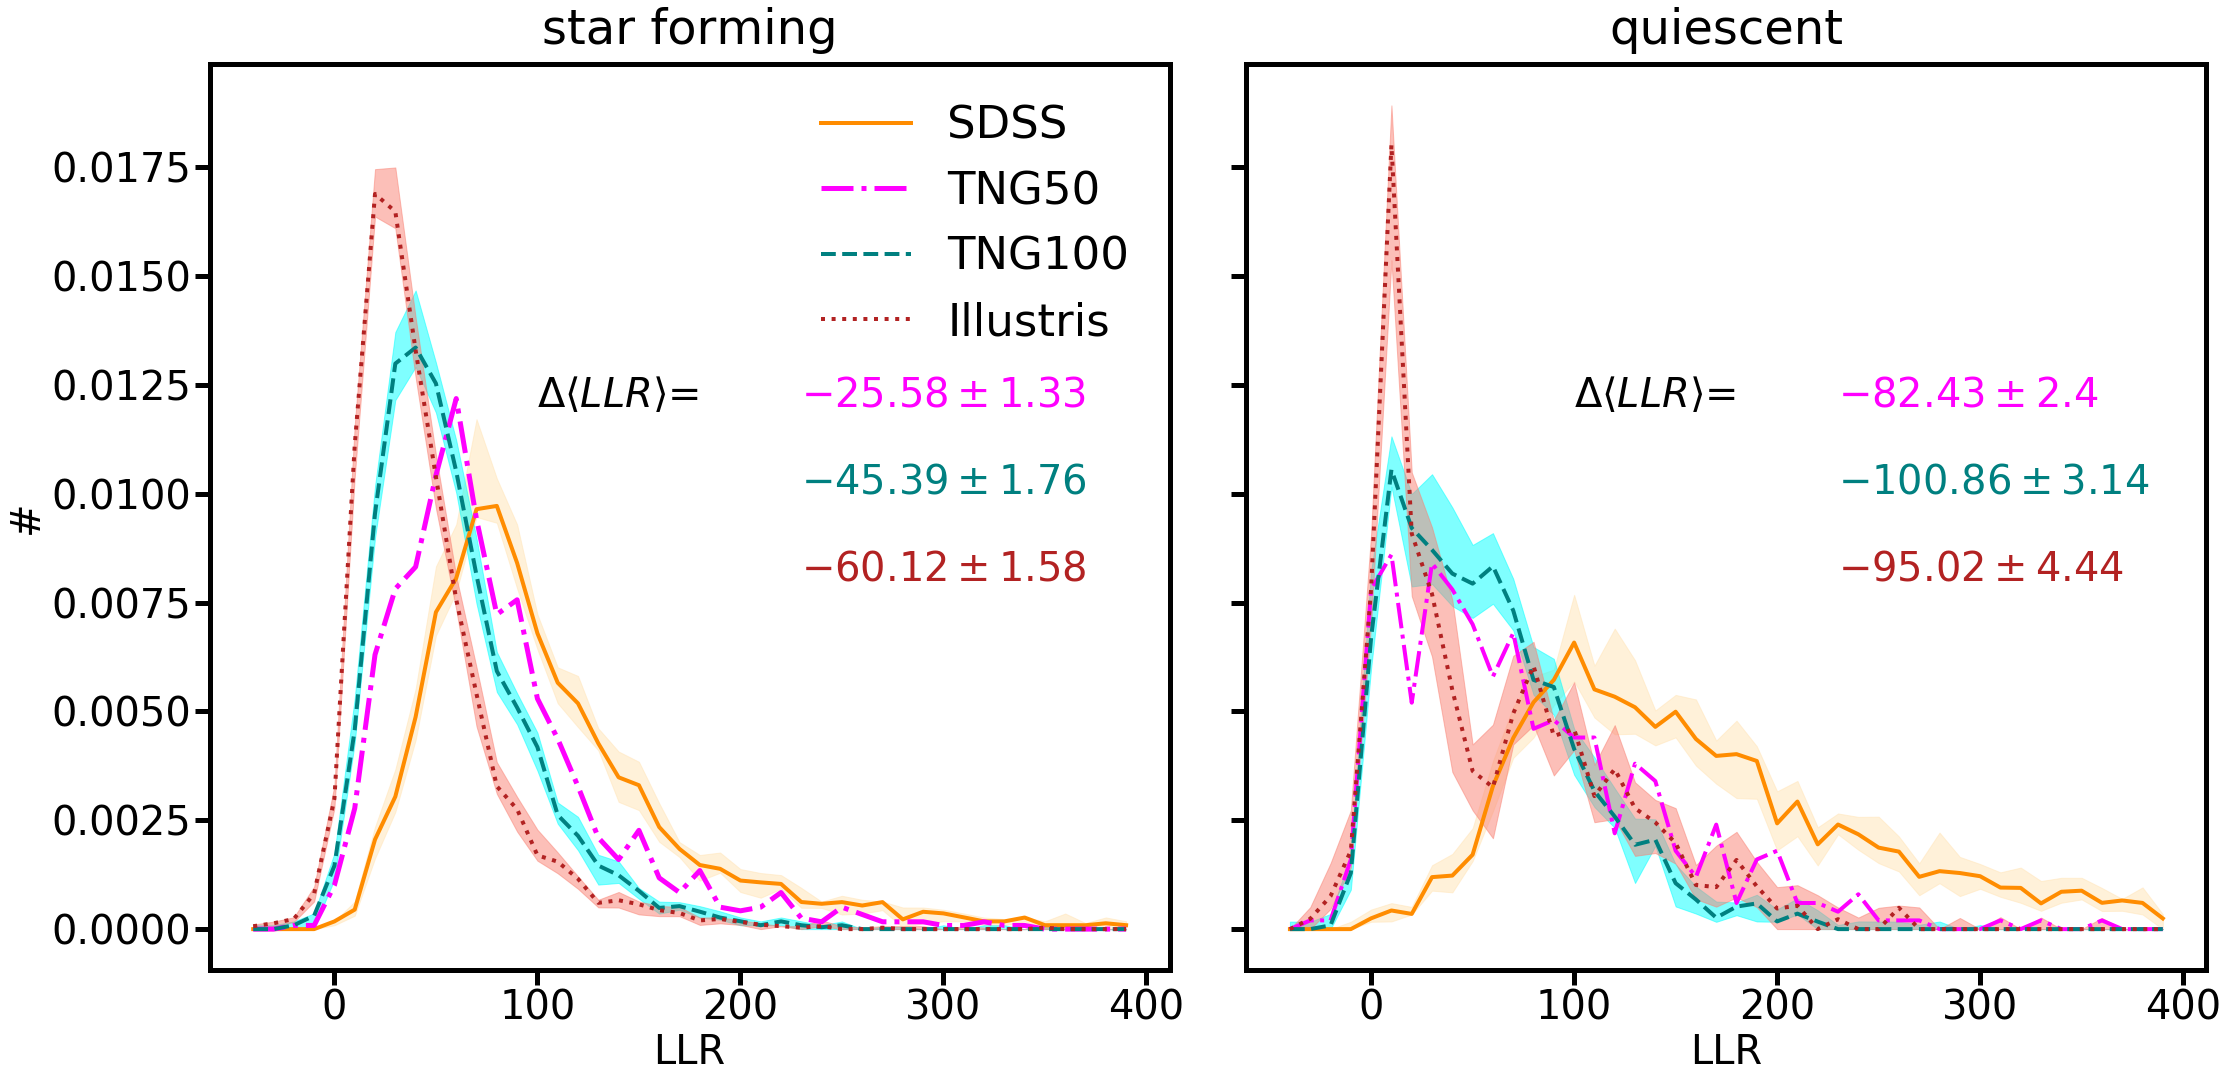

In [6]:

bins = np.arange(-50,400,10)

def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 10
    n = len(dset2)
    boot_mean = []
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
ys = 0.012
ax1.text(100,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(100,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='SF')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_SF)**2 )
            mean = -np.mean(boot_mean_SDSS_SF)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            print('here')
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            boot_mean_SDSS_SF = boot_mean.copy()
            
    
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='Q')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
        
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_Q)**2 )
            mean = -np.mean(boot_mean_SDSS_Q)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            
            boot_mean_SDSS_Q = boot_mean.copy()
    

    else:
        h = np.histogram(TNG50_SF['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        
        std = np.std(boot_mean_SDSS_SF)
        mean = -np.mean(boot_mean_SDSS_SF)+np.mean(TNG50_SF['LLR']) 
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
        h = np.histogram(TNG50_Q['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
        
        std = np.std(boot_mean_SDSS_Q)
        mean = -np.mean(boot_mean_SDSS_Q)+np.mean(TNG50_Q['LLR']) 
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
    if lab!='SDSS':
        ys = ys -0.002
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()

#fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma.pdf')

# for satellites only

In [14]:
def make_bootstrap(dset, dset2, choice='SF', centsat='sat'):
    Nboot = 100
    n = len(dset2)
    
    if centsat=='sat':
        LCentSat = 0
    elif centsat=='cen':
        LCentSat = 1
    else:
        pass
    boot_mean = []
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11 & LCentSat=={}'.format(LCentSat))
        elif choice=='Q':
            sample = sample.query('sSFR<-11 & LCentSat=={}'.format(LCentSat))
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)


fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
ys = 0.012
ax1.text(100,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(100,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='SF', centsat='sat')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_SF)**2 )
            mean = -np.mean(boot_mean_SDSS_SF)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            print('here')
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            boot_mean_SDSS_SF = boot_mean.copy()
            
    
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='Q', centsat='sat')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
        
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_Q)**2 )
            mean = -np.mean(boot_mean_SDSS_Q)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            
            boot_mean_SDSS_Q = boot_mean.copy()
    

    else:
        h = np.histogram(TNG50_sat_SF['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        
        std = np.std(boot_mean_SDSS_SF)
        mean = -np.mean(boot_mean_SDSS_SF)+np.mean(TNG50_sat_SF['LLR']) 
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
        h = np.histogram(TNG50_sat_Q['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
        
        std = np.std(boot_mean_SDSS_Q)
        mean = -np.mean(boot_mean_SDSS_Q)+np.mean(TNG50_sat_Q['LLR']) 
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
    if lab!='SDSS':
        ys = ys -0.002
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()

ax1.text(240,0.022, 'satellites', fontsize=55)
#fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_sat.pdf')

here
here


Text(240, 0.022, 'satellites')

 for centrals only

here
here


Text(240, 0.015, 'centrals')

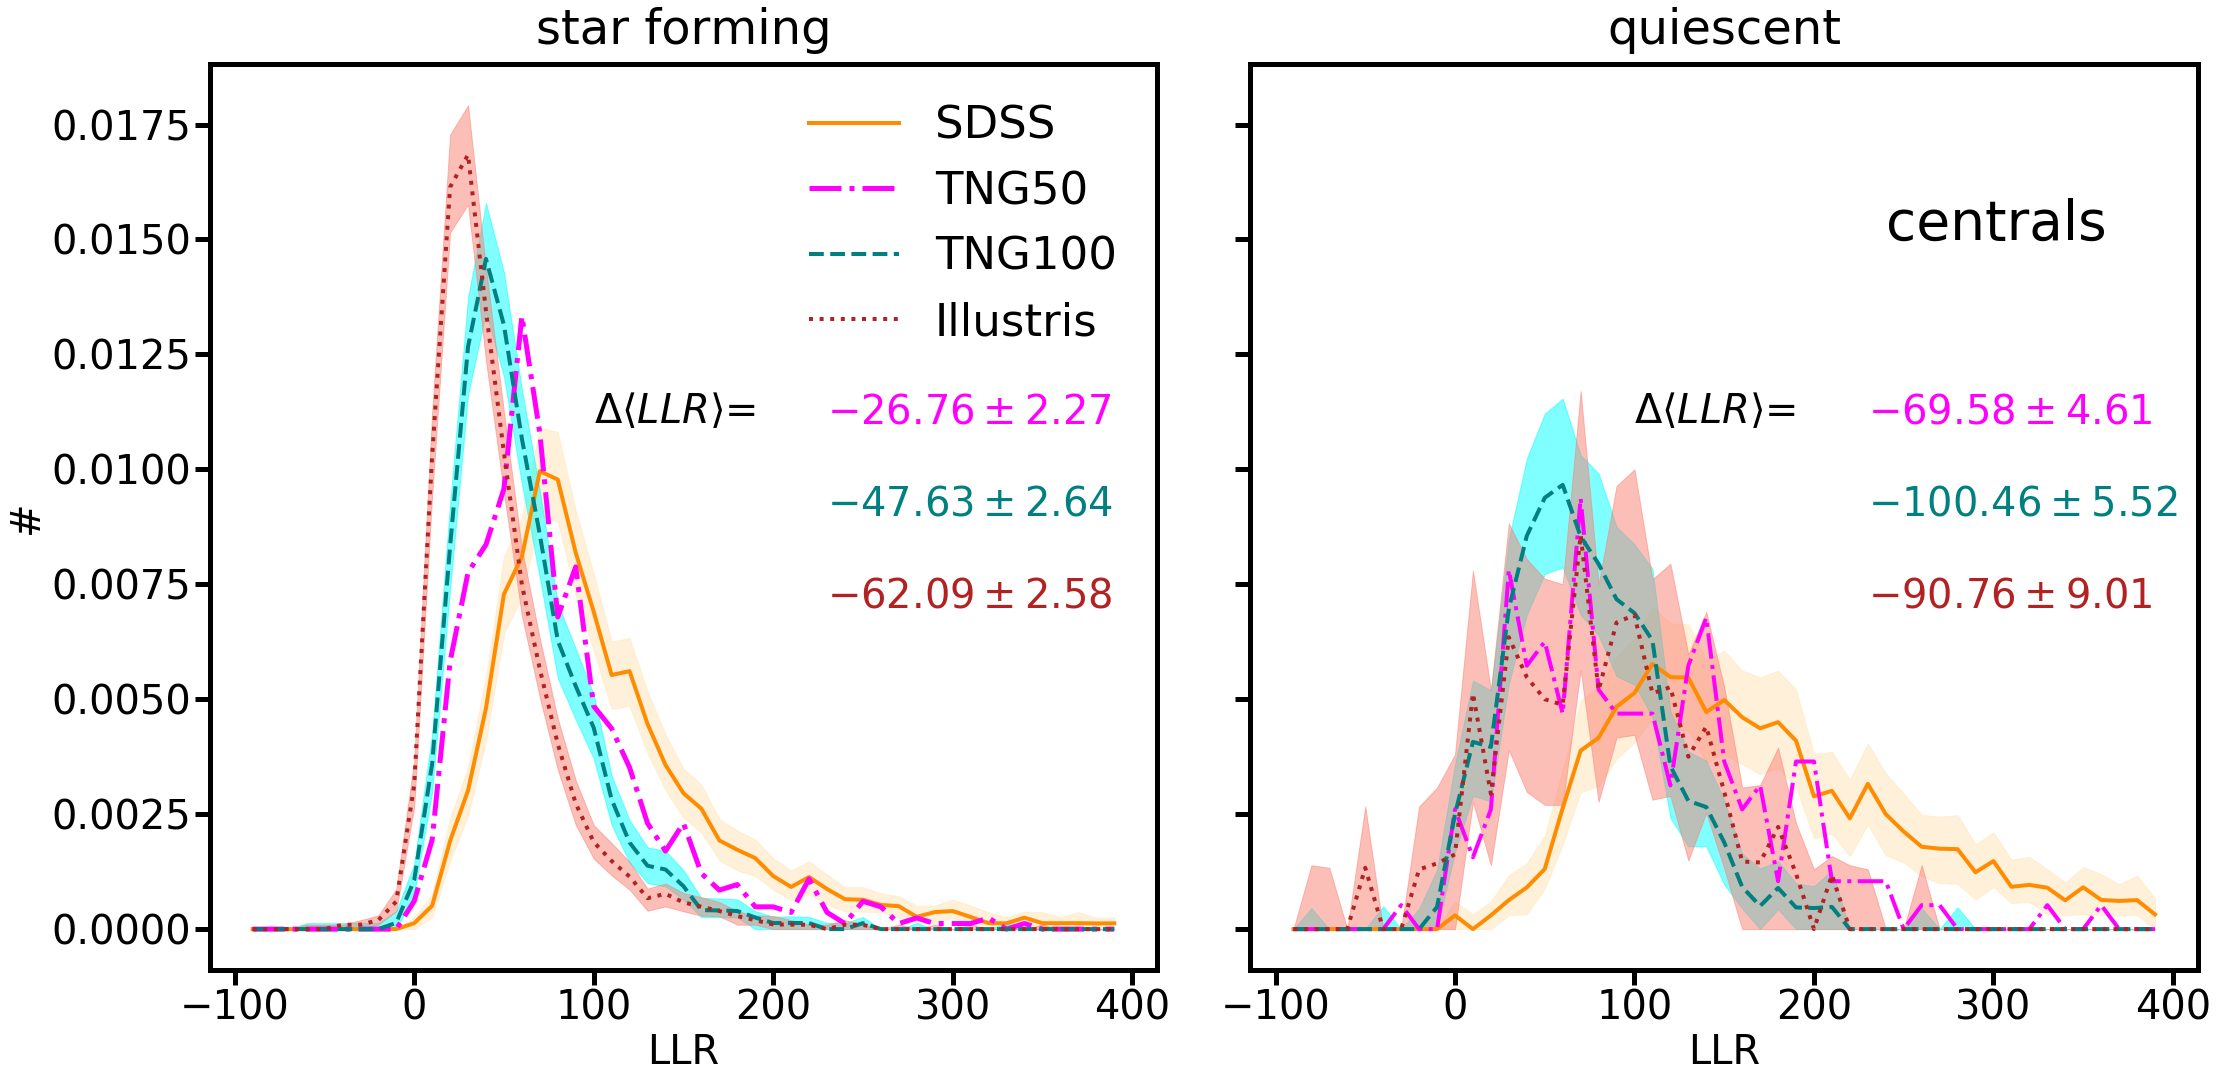

In [15]:
def make_bootstrap(dset, dset2, choice='SF', centsat='sat'):
    Nboot = 1000
    n = len(dset2)
    
    if centsat=='sat':
        LCentSat = 0
    elif centsat=='cen':
        LCentSat = 1
    else:
        pass
    boot_mean = []
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11 & LCentSat=={}'.format(LCentSat))
        elif choice=='Q':
            sample = sample.query('sSFR<-11 & LCentSat=={}'.format(LCentSat))
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)


fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
ys = 0.011
ax1.text(100,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(100,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='SF', centsat='cen')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_SF)**2 )
            mean = -np.mean(boot_mean_SDSS_SF)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            print('here')
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            boot_mean_SDSS_SF = boot_mean.copy()
            
    
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='Q', centsat='cen')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
        
        if lab!='SDSS':
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS_Q)**2 )
            mean = -np.mean(boot_mean_SDSS_Q)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
           
        else:
            
            boot_mean_SDSS_Q = boot_mean.copy()
    

    else:
        h = np.histogram(TNG50_cen_SF['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        
        std = np.std(boot_mean_SDSS_SF)
        mean = -np.mean(boot_mean_SDSS_SF)+np.mean(TNG50_cen_SF['LLR']) 
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
        h = np.histogram(TNG50_cen_Q['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
        
        std = np.std(boot_mean_SDSS_Q)
        mean = -np.mean(boot_mean_SDSS_Q)+np.mean(TNG50_cen_Q['LLR']) 
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        
    if lab!='SDSS':
        ys = ys -0.002
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()

ax1.text(240,0.015, 'centrals', fontsize=55)
#fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_cen.pdf')

### binning only in the region where SDSS and simulations coexist

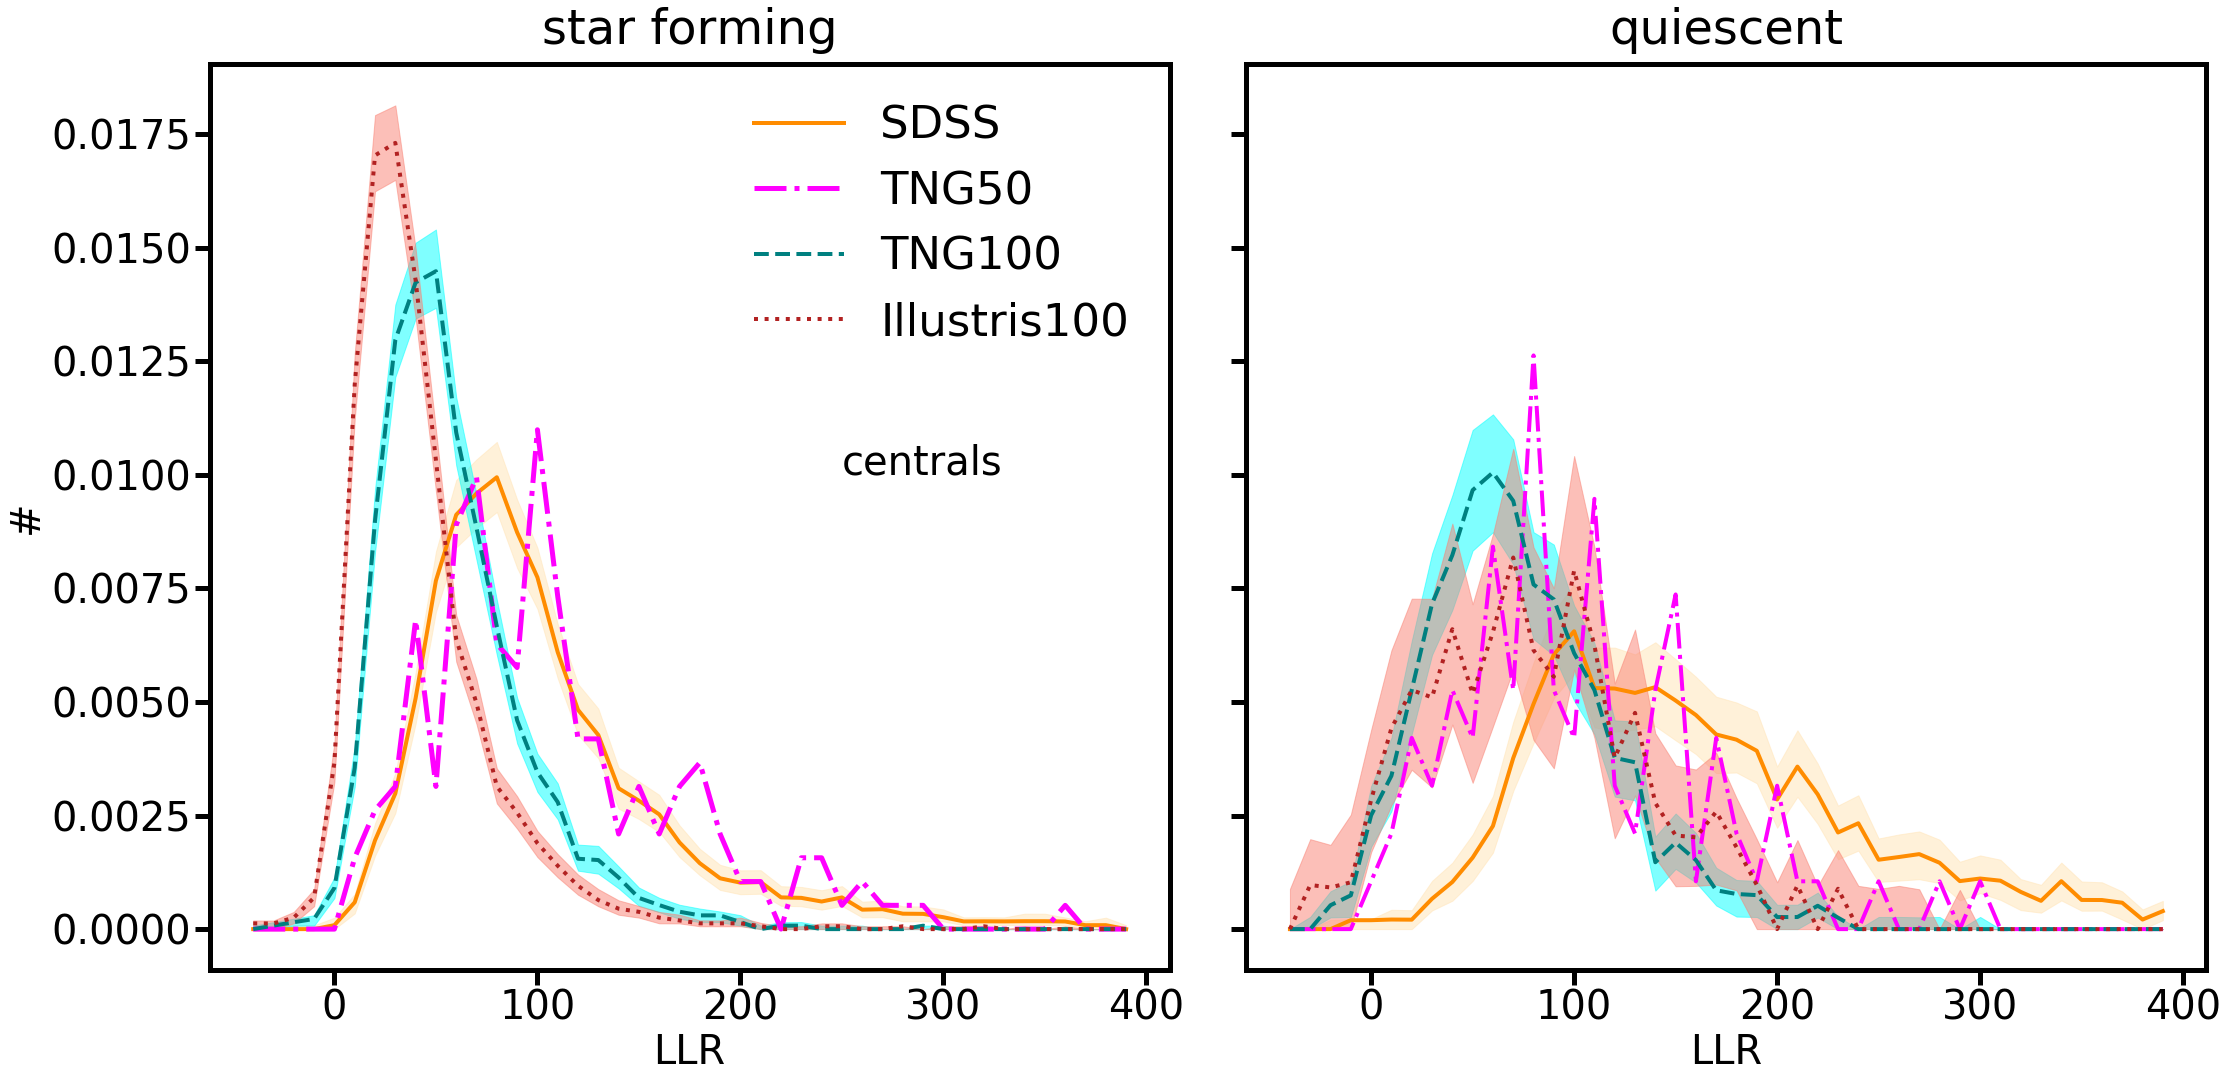

In [79]:
binsx = np.linspace(9.5,12,8)
binsy = np.linspace(-0.5,1.7,8)
stat_SDSS_Q, x,y,_ = binned_statistic_2d(SDSS_cen_Q['Mstar'],SDSS_cen_Q['$logR_e \ [arcsec]$'], values=SDSS_cen_Q['LLR'], statistic='mean',bins=[binsx,binsy])
stat_SDSS_Q = stat_SDSS_Q.T
stat_SDSS_SF, x,y,_ = binned_statistic_2d(SDSS_cen_SF['Mstar'],SDSS_cen_SF['$logR_e \ [arcsec]$'], values=SDSS_cen_SF['LLR'], statistic='mean',bins=[binsx,binsy])
stat_SDSS_SF = stat_SDSS_SF.T

binsx_ = binsx[1:]-0.5*(binsx[1]-binsx[0])
binsy_ = binsy[1:]-0.5*(binsy[1]-binsy[0])
TNG50_id = []
TNG_id = []
Illustris_id = []
for i,bx in enumerate(binsx_):
    for j, by in enumerate(binsy_):
        if not np.isnan(stat_SDSS_Q[i][j]):
            TNG50_id.extend(TNG50_cen_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            TNG_id.extend(TNG_cen_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            Illustris_id.extend(Illustris_cen_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
        if not np.isnan(stat_SDSS_SF[i][j]):
            TNG50_id.extend(TNG50_cen_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            TNG_id.extend(TNG_cen_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            Illustris_id.extend(Illustris_cen_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
        

TNG_cen_ = TNG_cen.loc[TNG_id]
TNG50_cen_ = TNG50_cen.loc[TNG50_id]
Illustris_cen_= Illustris_cen.loc[Illustris_id]
fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))

for dset, (lab, col, facecol,ls) in zip([SDSS_cen,TNG50_cen,TNG_cen, Illustris_cen], zip(['SDSS','TNG50','TNG100','Illustris100'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up = make_bootstrap(dset, TNG50, choice='SF')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

        low,med,up = make_bootstrap(dset, TNG50, choice='Q')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
    else:
        h = np.histogram(TNG50_cen_.query('sSFR>-11')['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        h = np.histogram(TNG50_cen_.query('sSFR<-11')['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.') 
        
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()
ax2.text(250,0.01, 'centrals')
fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_cen_onlyOnSDSSmanifold.pdf')

# for high/low mass

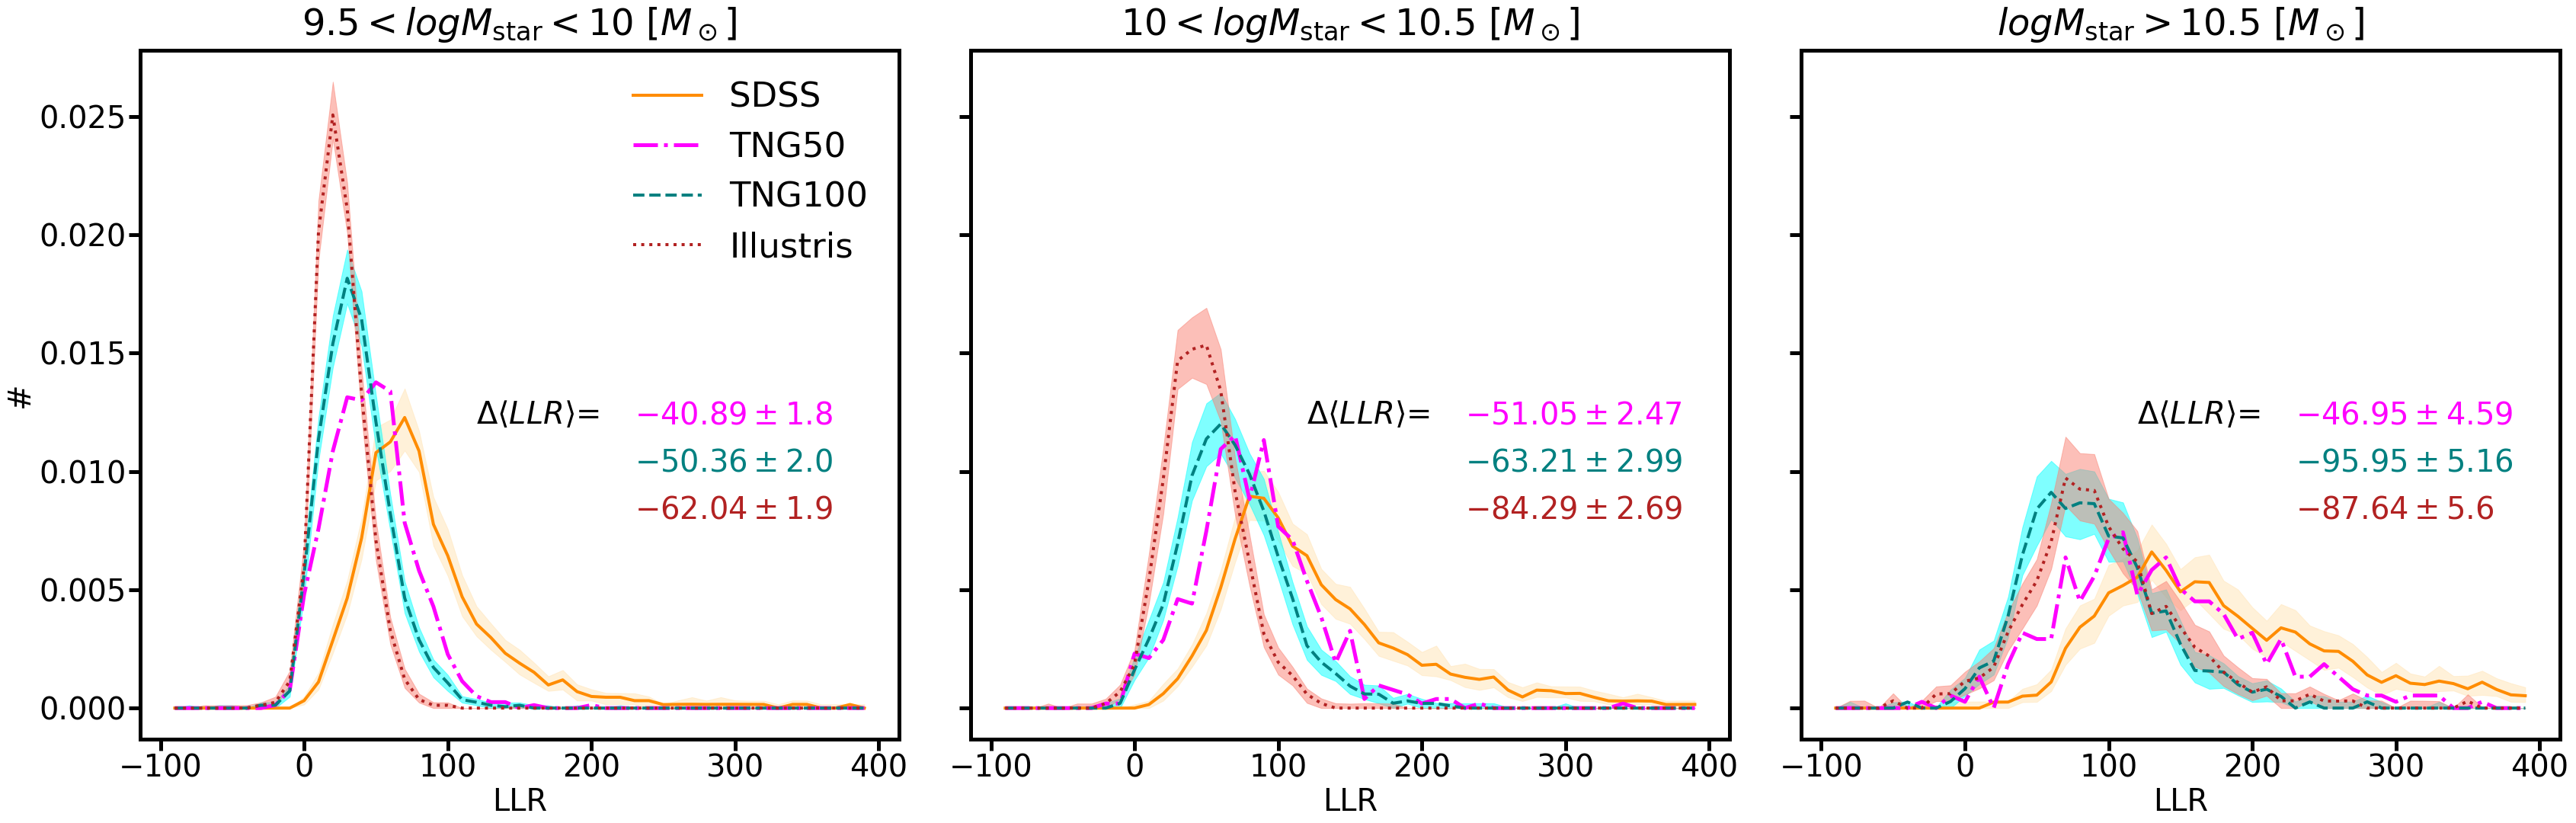

In [7]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10')
TNG50_med = TNG50.query('10<Mstar<10.5')
TNG50_high = TNG50.query('Mstar>10.5')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()

fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses.pdf')

# high/low mass SF

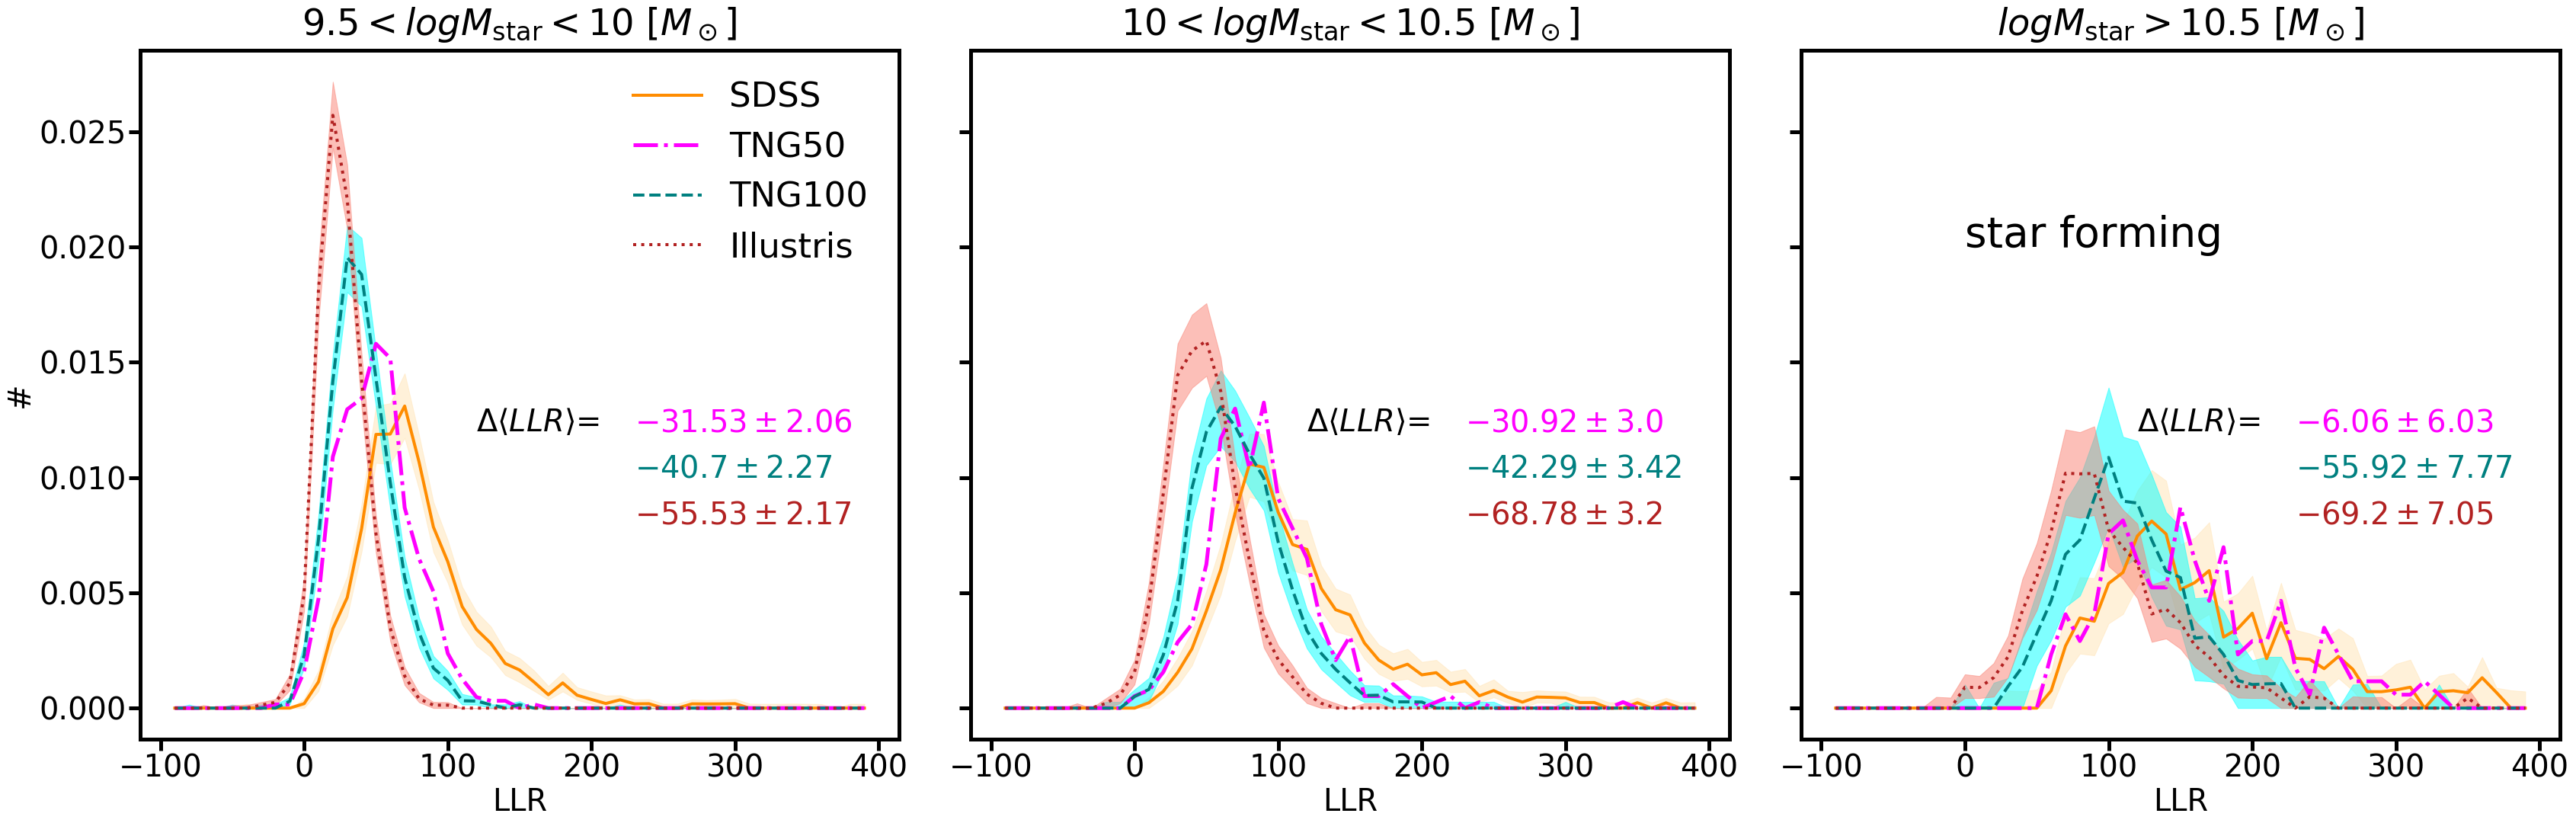

In [8]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 1000
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR>-11')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR>-11')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR>-11')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR>-11')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR>-11')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR>-11')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.02, 'star forming', fontsize=55)
fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_SF.pdf')

# high/ low mass Q

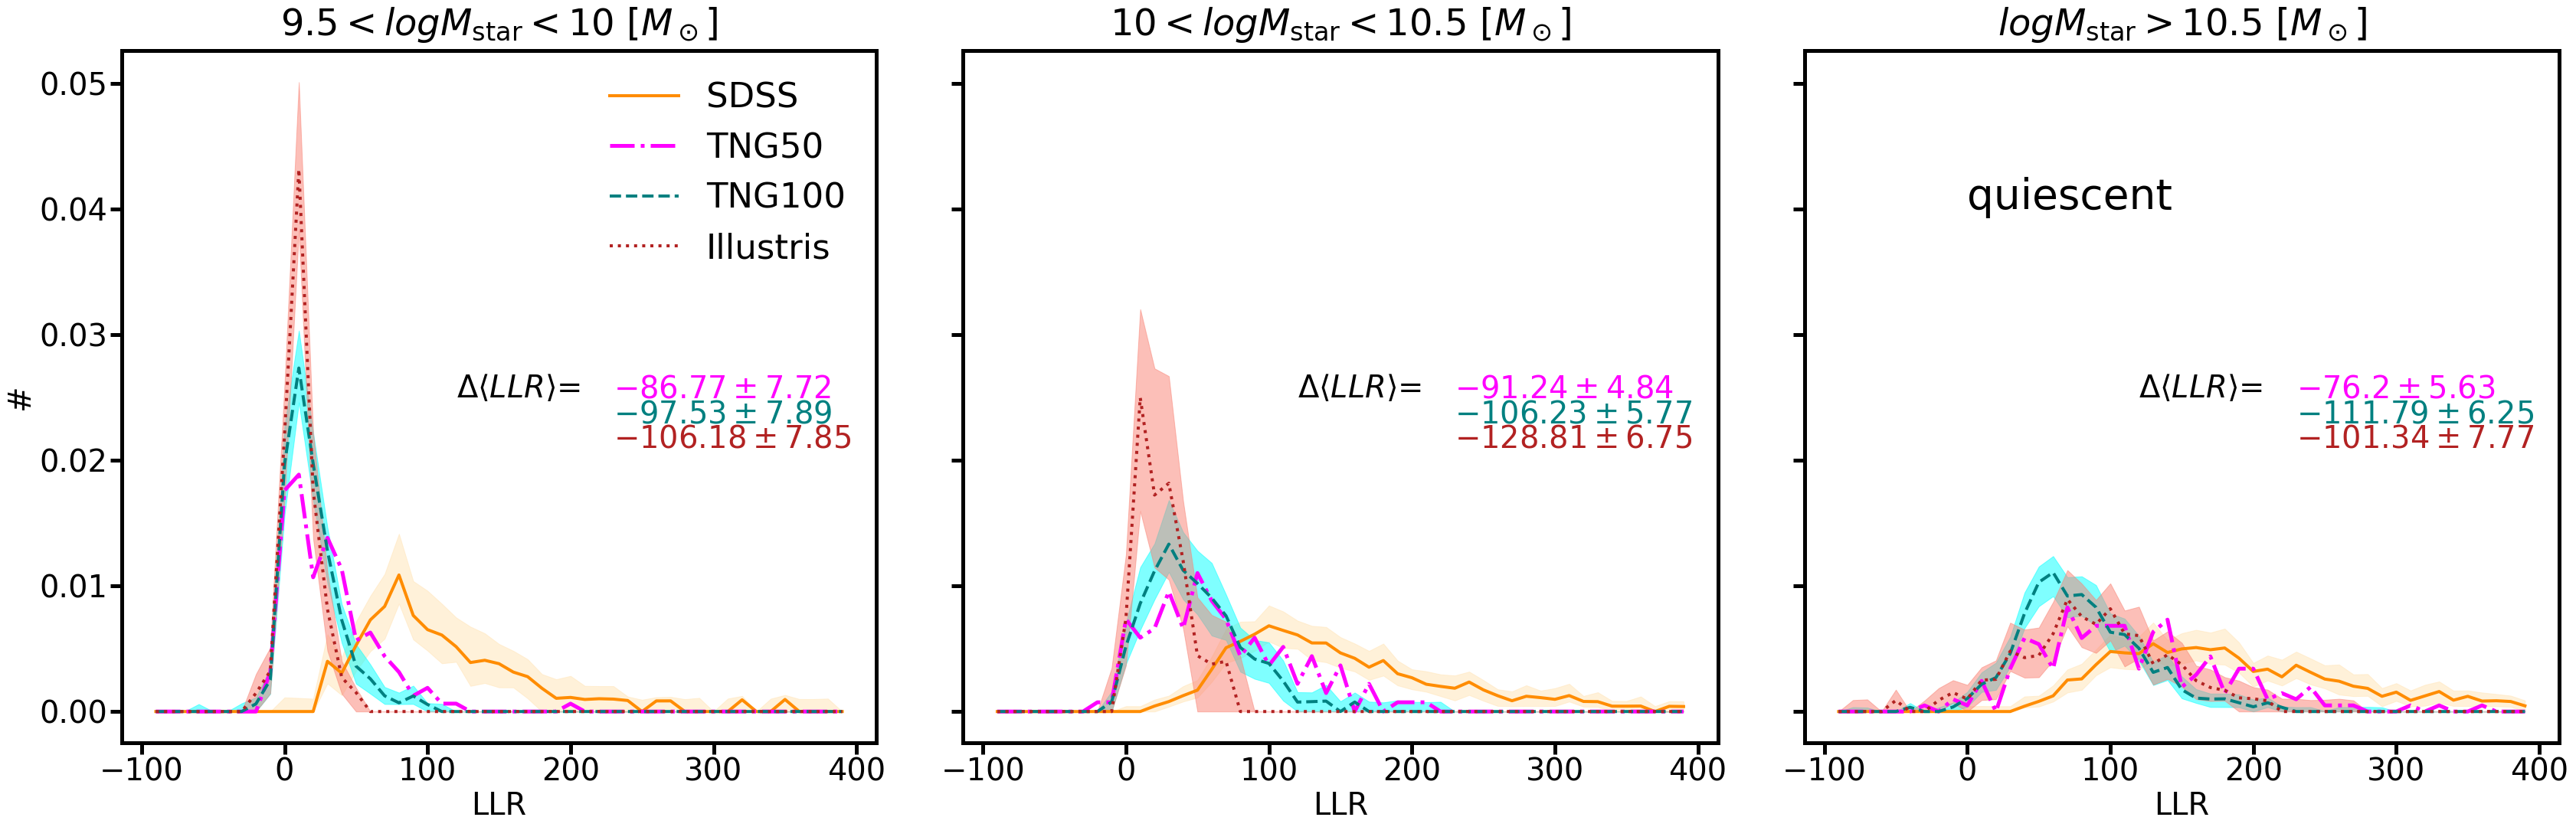

In [9]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR<-11')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR<-11')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR<-11')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR<-11')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR<-11')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR<-11')
ys = 0.025
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.025
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.025
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.04, 'quiescent', fontsize=55)

fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_Q.pdf')

# high/low mass SF satellites

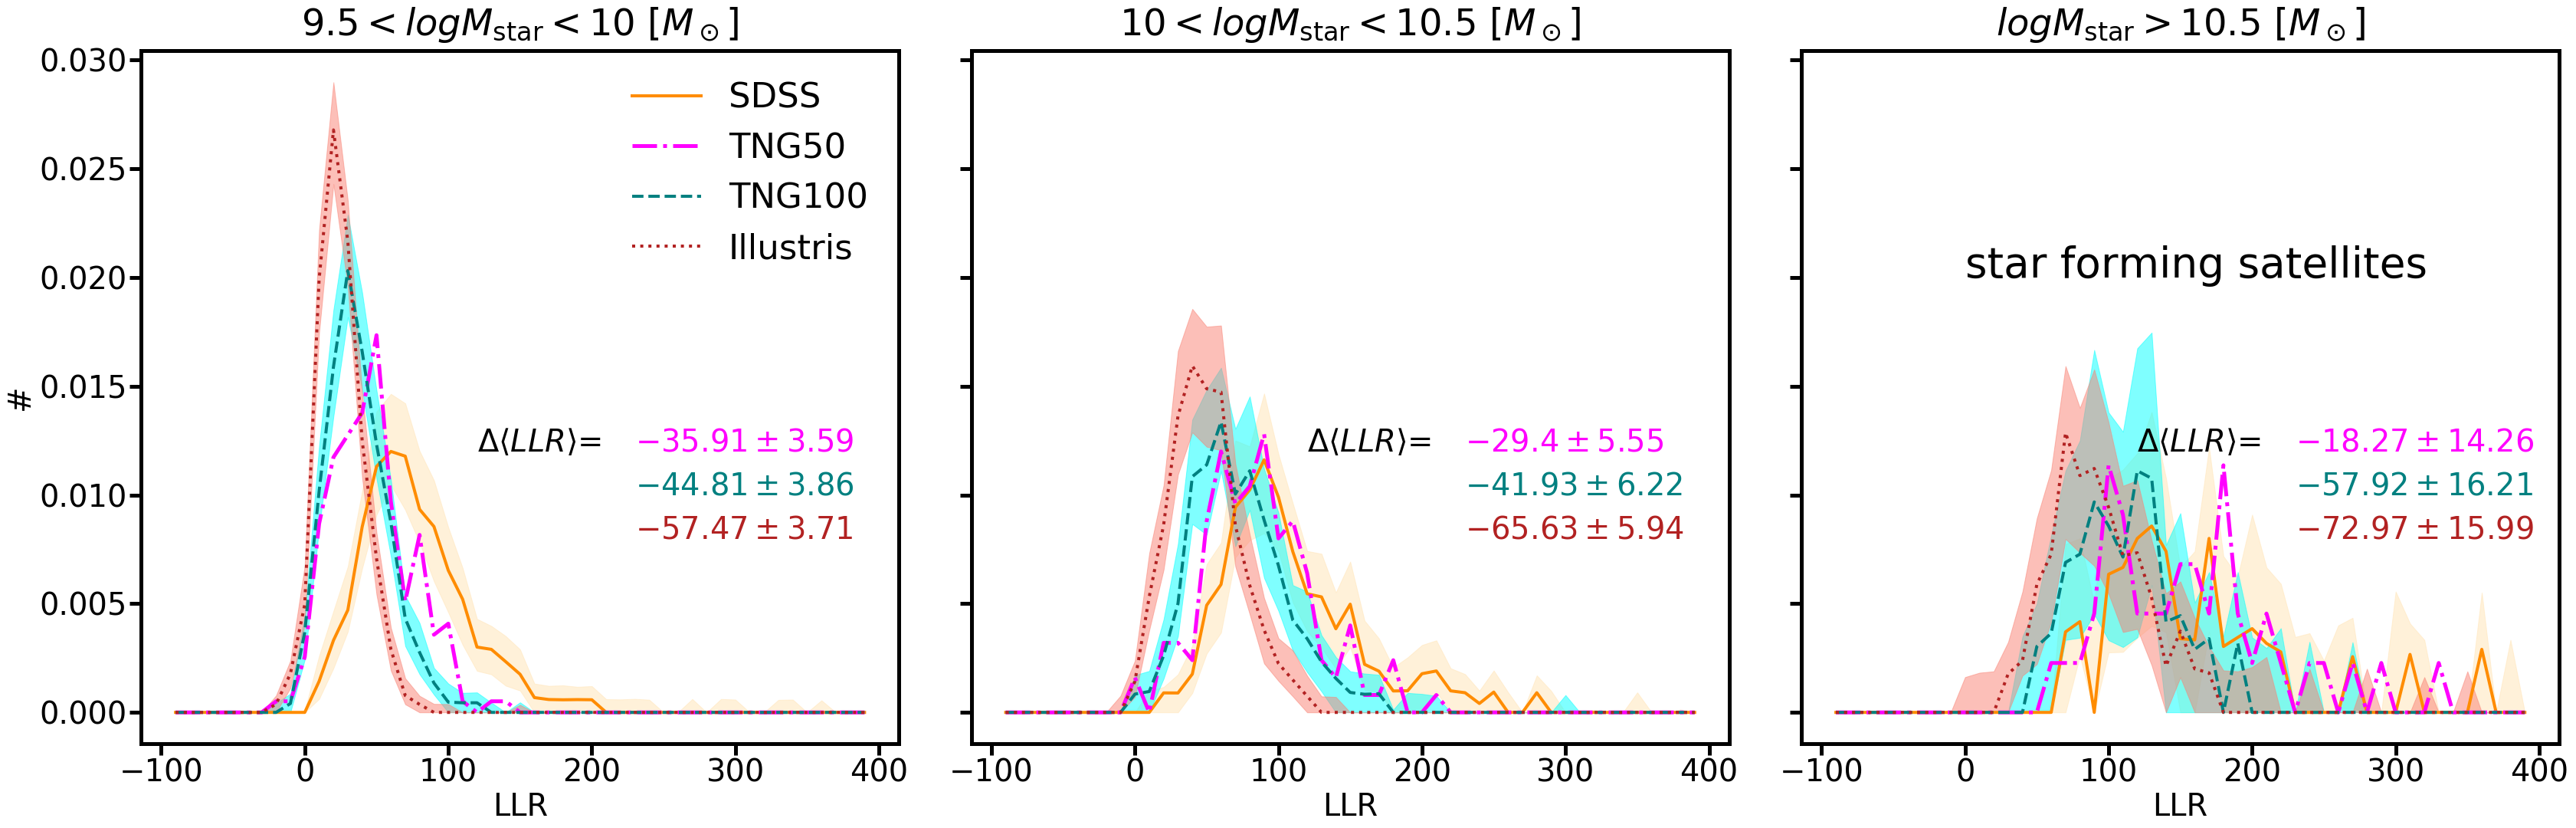

In [7]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR>-11 & LCentSat==0')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR>-11 & LCentSat==0')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR>-11 & LCentSat==0')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR>-11 & LCentSat==0')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR>-11 & LCentSat==0')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR>-11 & LCentSat==0')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.02, 'star forming satellites', fontsize=55)
fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_SF_sat.pdf')

# high/low mass satellites Quiescent

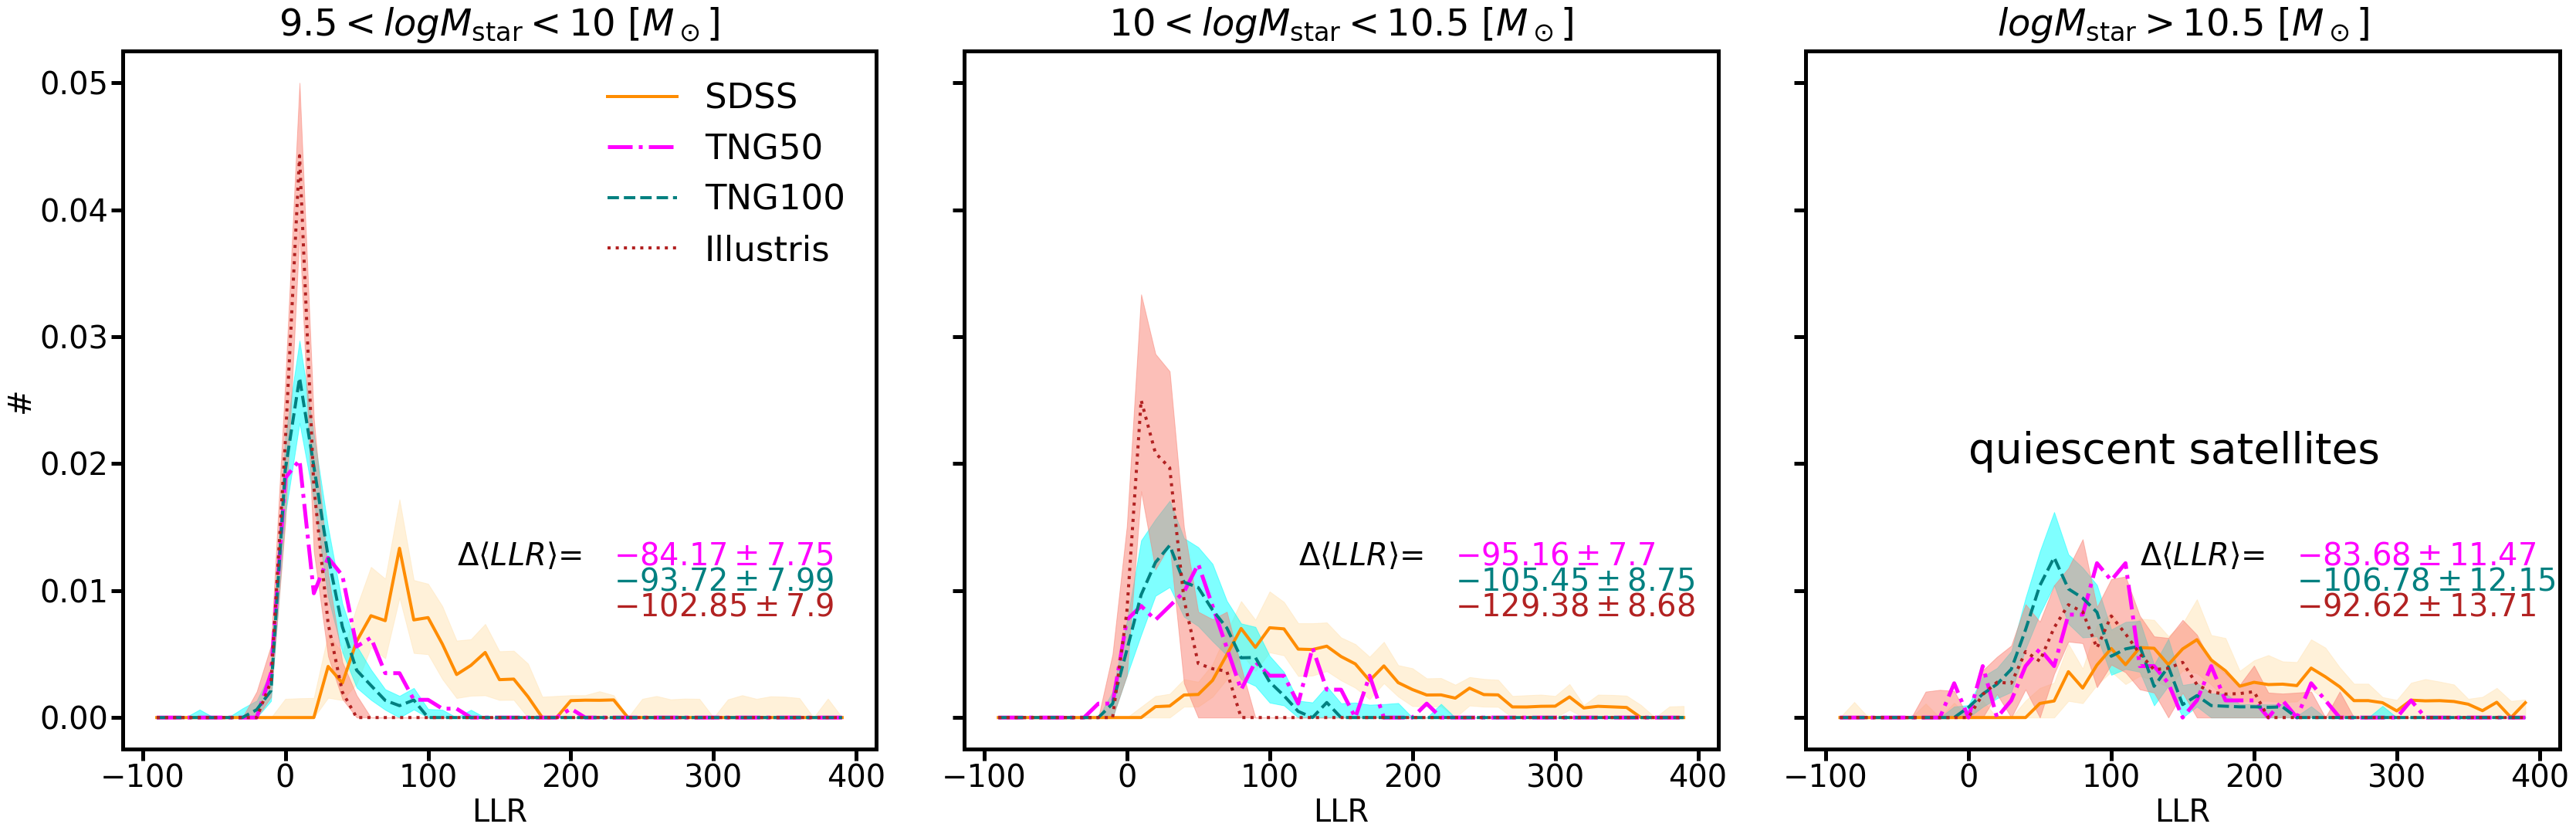

In [8]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR<-11 & LCentSat==0')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR<-11 & LCentSat==0')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR<-11 & LCentSat==0')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR<-11 & LCentSat==0')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR<-11 & LCentSat==0')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR<-11 & LCentSat==0')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.02, 'quiescent satellites', fontsize=55)
fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_Q_sat.pdf')

# high/low mass SF centrals

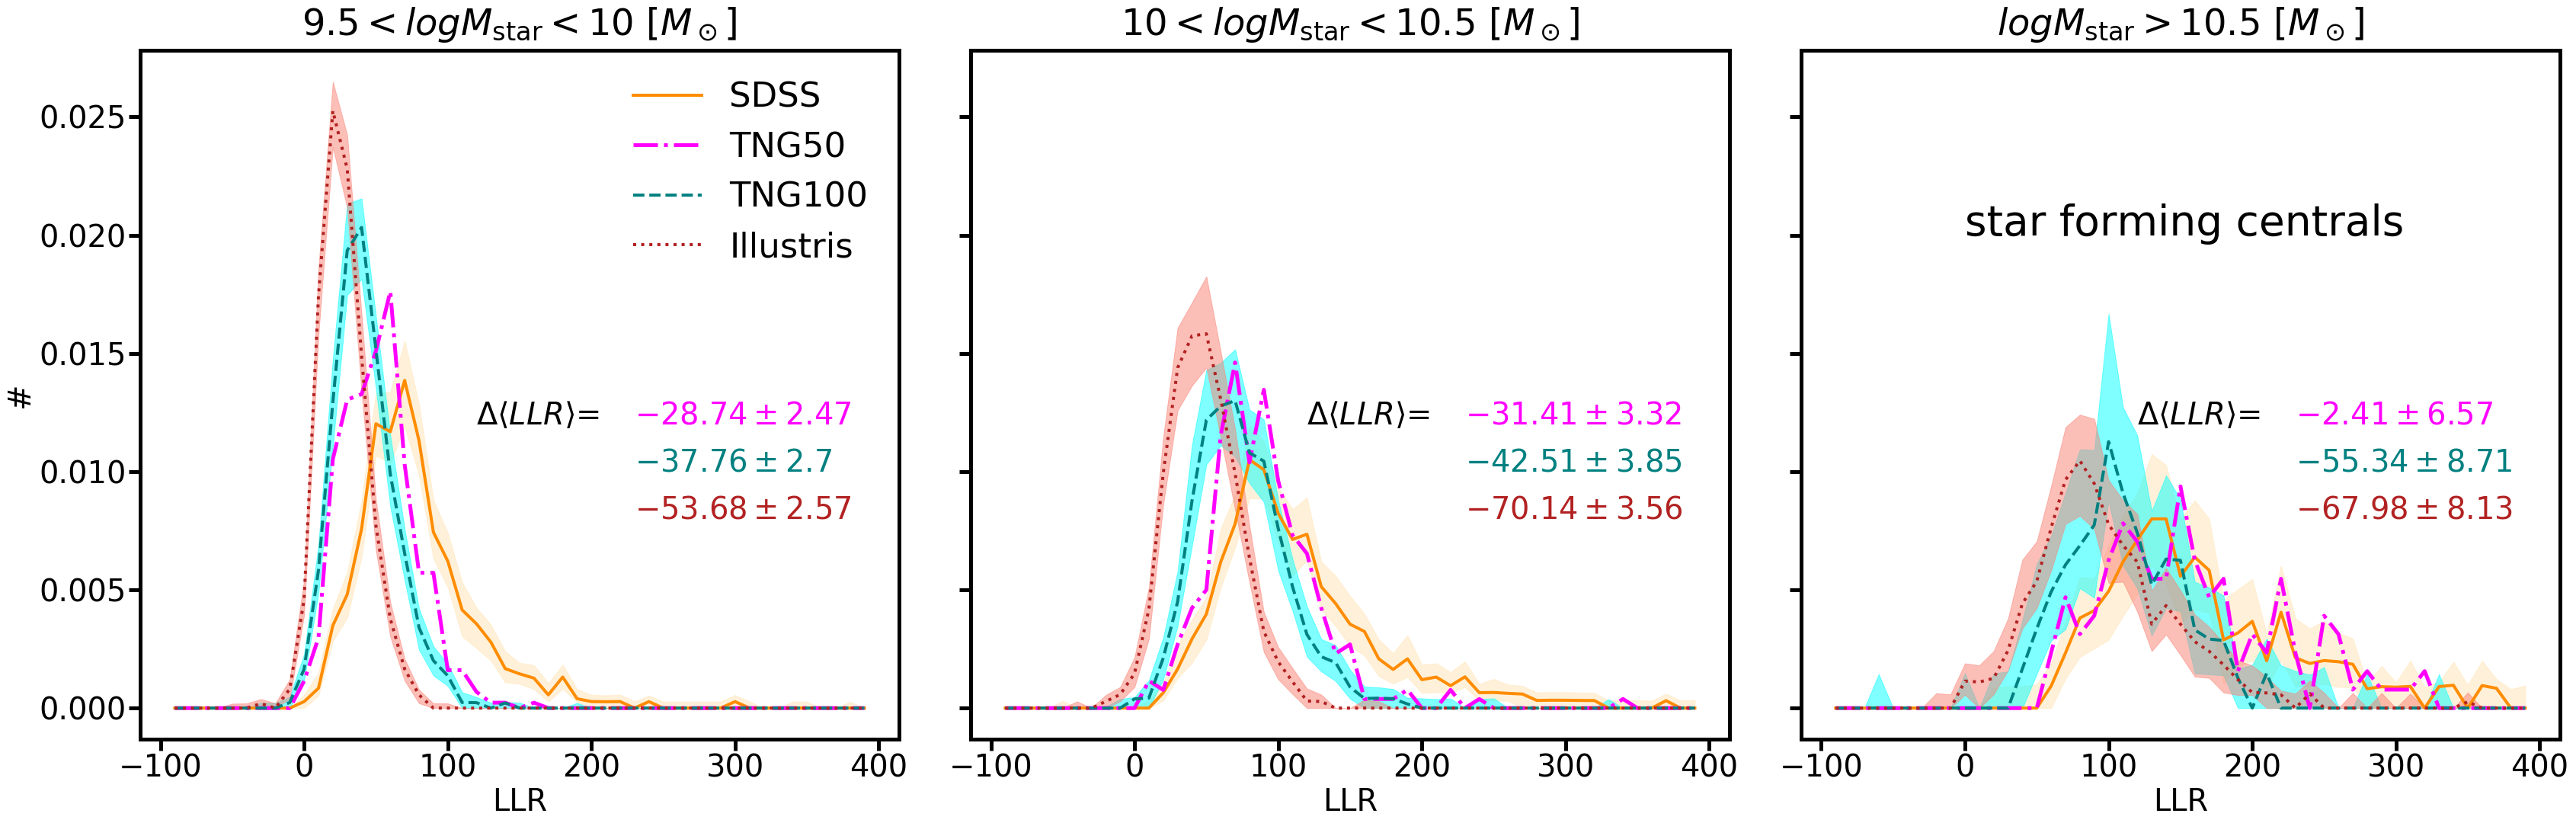

In [9]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR>-11 & LCentSat==1')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR>-11 & LCentSat==1')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR>-11 & LCentSat==1')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR>-11 & LCentSat==1')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR>-11 & LCentSat==1')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR>-11 & LCentSat==1')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax2.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002
        
        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50' and lab!='Sersic':
        
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        if lab=='SDSS':
            boot_mean_SDSS = boot_mean.copy()
            
        ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        
        if lab!='SDSS':
          #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
            std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
            mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            #boot_low = np.round(boot_low,2)
          #  boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
            #print(boot_low)
            #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            ys = ys-0.002
    elif lab=='TNG50':
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        std = np.std(boot_mean_SDSS)
        mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
       # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
        #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
       # boot_low = np.round(boot_low,2)
       # boot_med = np.round(boot_med,2)
       # boot_up = np.round(boot_up,2)
       # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
        ax3.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
        #ax.text(300,ys,np.round(text,2),color=col)
        ys = ys-0.002

#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.02, 'star forming centrals', fontsize=55)
fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_SF_cen.pdf')

# high/low mass Q centrals

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


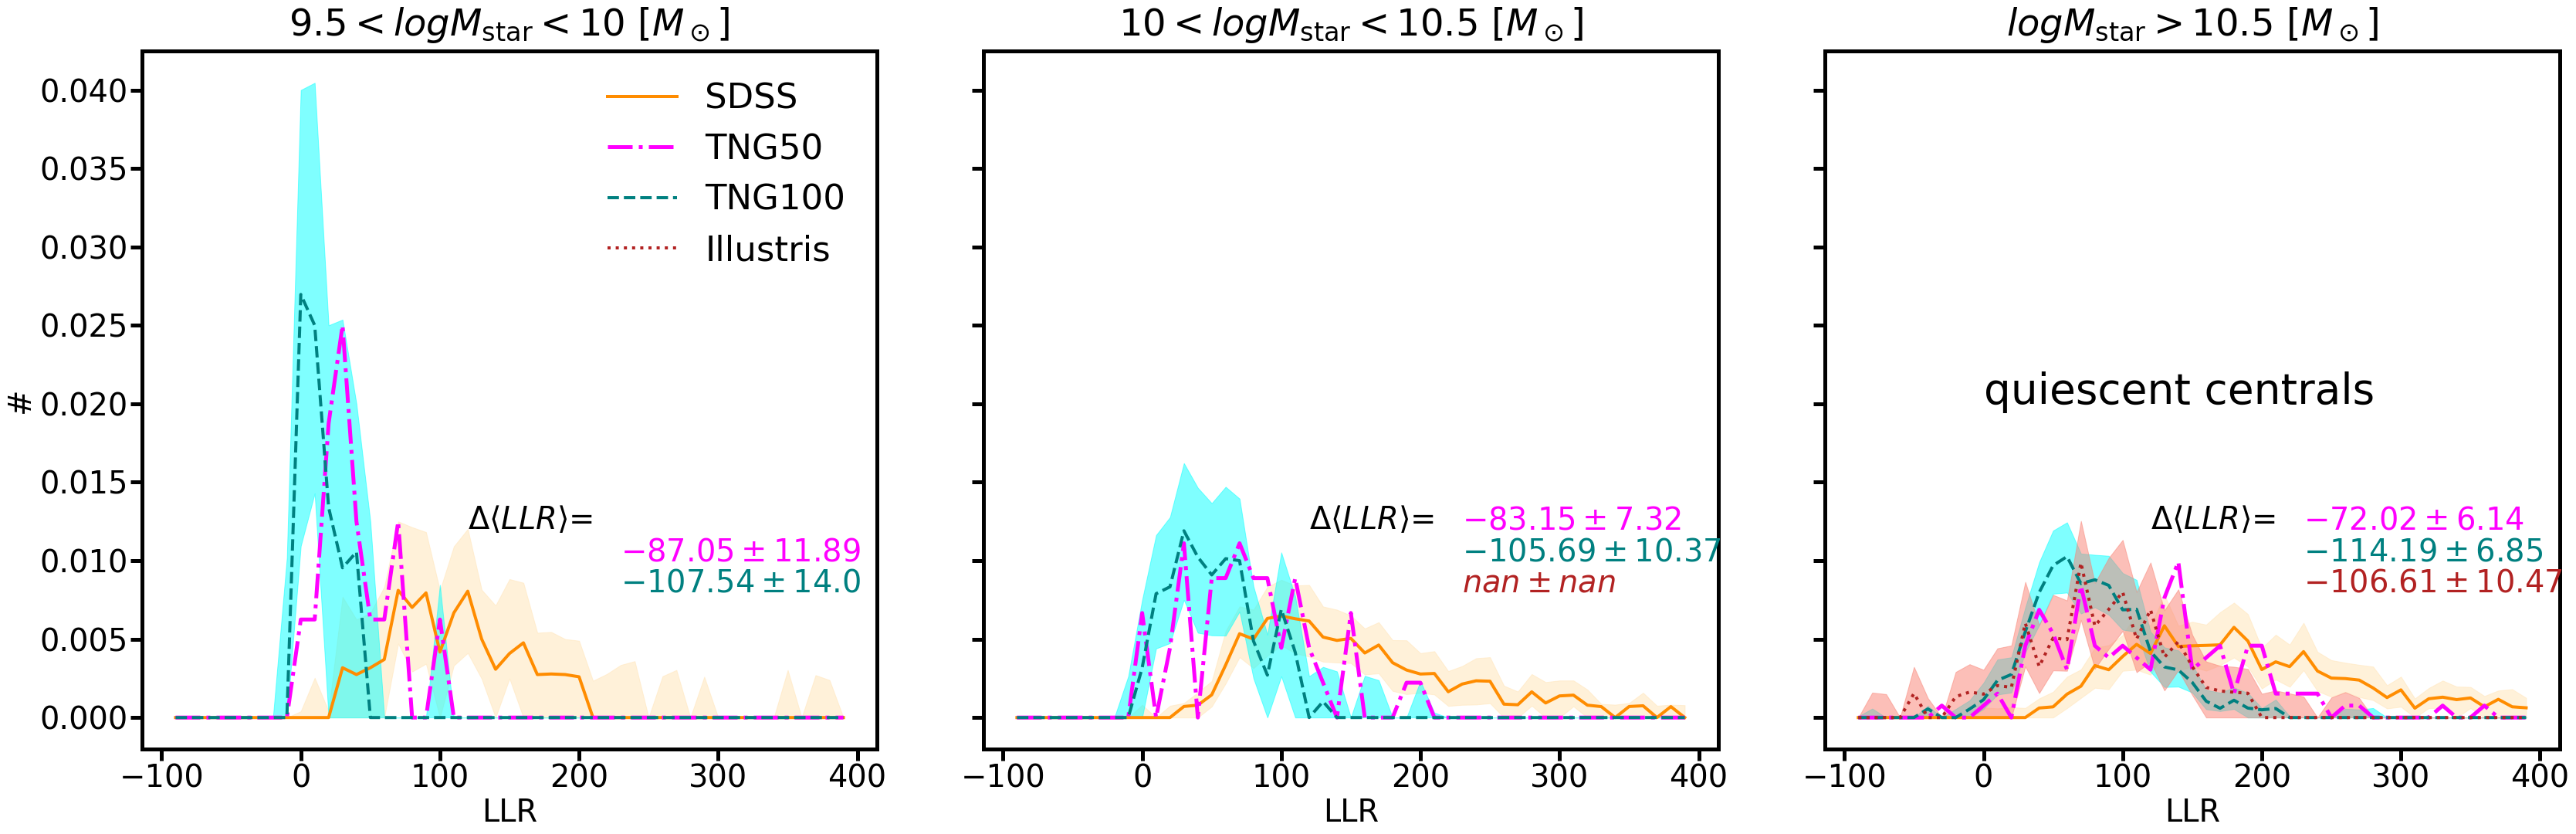

In [10]:
bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='highmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR<-11 & LCentSat==1')# & sSFR<-11 & LCentSat==0')
        elif choice=='lowmass':
            sample = sample.query('9.5<Mstar<10 & sSFR<-11 & LCentSat==1')# & Mstar>10 & sSFR<-11 & LCentSat==0')
        elif choice=='medmass':
            sample = sample.query('10<Mstar<10.5 & sSFR<-11 & LCentSat==1')
        else:
            raise ValueError
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(48,16), sharey=True)
TNG50_low = TNG50.query('9.5<Mstar<10 &sSFR<-11 & LCentSat==1')
TNG50_med = TNG50.query('10<Mstar<10.5 &sSFR<-11 & LCentSat==1')
TNG50_high = TNG50.query('Mstar>10.5 &sSFR<-11 & LCentSat==1')
ys = 0.012
ax1.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax2.text(120,ys,r'$\Delta \langle LLR \rangle$=')
ax3.text(120,ys,r'$\Delta \langle LLR \rangle$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    
        if lab!='TNG50' and lab!='Sersic':

            low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
            if lab=='SDSS':
                boot_mean_SDSS = boot_mean.copy()

            ax1.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
            ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
            try:
                if lab!='SDSS':
                  #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
                    std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
                    mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
                  #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
                    #boot_low = np.round(boot_low,2)
                  #  boot_med = np.round(boot_med,2)
                   # boot_up = np.round(boot_up,2)
                    #print(boot_low)
                    #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
                    if lab!='Illustris':
                        ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color=col)
            except:
                print(f'lowmass not available for {lab}')
            ys = ys-0.002
        elif lab=='TNG50':
            try:
                h = np.histogram(TNG50_low['LLR'],bins=bins, density=True)[0]
                ax1.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
                std = np.std(boot_mean_SDSS)
                mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_low['LLR']) 
               # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
                #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
               # boot_low = np.round(boot_low,2)
               # boot_med = np.round(boot_med,2)
               # boot_up = np.round(boot_up,2)
               # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
                if lab!='Illustris':
                    ax1.text(230,ys,r'${}\pm{}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
                #ax.text(300,ys,np.round(text,2),color=col)
            except:
                print('lowmass not available for TNG50')
            ys = ys-0.002


        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
        if lab!='TNG50' and lab!='Sersic':

            low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='medmass')
            if lab=='SDSS':
                boot_mean_SDSS = boot_mean.copy()

            ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
            ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

            if lab!='SDSS':
                try:
                  #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
                    std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
                    mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
                  #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
                    #boot_low = np.round(boot_low,2)
                  #  boot_med = np.round(boot_med,2)
                   # boot_up = np.round(boot_up,2)
                    #print(boot_low)
                    #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
                    ax2.text(230,ys,r'${}\pm {}$'.format(np.round(mean,2),np.round(std,2)),color=col)
                except ParseFatalException:
                    print(f'medmass not available for {lab}')
                ys = ys-0.002
                
        elif lab=='TNG50':
            try:
                h = np.histogram(TNG50_med['LLR'],bins=bins, density=True)[0]
                ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
                std = np.std(boot_mean_SDSS)
                mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_med['LLR']) 
               # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
                #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
               # boot_low = np.round(boot_low,2)
               # boot_med = np.round(boot_med,2)
               # boot_up = np.round(boot_up,2)
               # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
                ax2.text(230,ys,r'${}\pm {}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
                #ax.text(300,ys,np.round(text,2),color=col)
            except:
                print('medmass not available for TNG50')
            ys = ys-0.002


        
ys = 0.012
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
        if lab!='TNG50' and lab!='Sersic':

            low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
            if lab=='SDSS':
                boot_mean_SDSS = boot_mean.copy()

            ax3.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
            ax3.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

            if lab!='SDSS':
              #  boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS,[16,50,84])
                std = np.sqrt(np.std(boot_mean)**2 + np.std(boot_mean_SDSS)**2 )
                mean = -np.mean(boot_mean_SDSS)+np.mean(boot_mean) 
              #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
                #boot_low = np.round(boot_low,2)
              #  boot_med = np.round(boot_med,2)
               # boot_up = np.round(boot_up,2)
                #print(boot_low)
                #ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
                ax3.text(230,ys,r'${}\pm {}$'.format(np.round(mean,2),np.round(std,2)),color=col)
                ys = ys-0.002
        elif lab=='TNG50':
            h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
            ax3.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
            std = np.std(boot_mean_SDSS)
            mean = -np.mean(boot_mean_SDSS)+np.mean(TNG50_high['LLR']) 
           # boot_low, boot_med,boot_up = np.percentile(TNG50['LLR'].mean()-boot_mean_SDSS,[16,50,84])
            #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
           # boot_low = np.round(boot_low,2)
           # boot_med = np.round(boot_med,2)
           # boot_up = np.round(boot_up,2)
           # ax.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ax3.text(230,ys,r'${}\pm {}$'.format(np.round(mean,2),np.round(std,2)),color='magenta')
            #ax.text(300,ys,np.round(text,2),color=col)
            ys = ys-0.002


#ax1.legend(frameon=False, fontsize=45)
ax1.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax3.set_xlabel('LLR')
ax1.set_ylabel('#')

ax1.set_title(r'$9.5<logM_{\rm star}<10 \ [M_\odot]$')
ax2.set_title(r'$10<logM_{\rm star}<10.5 \ [M_\odot]$')
ax3.set_title(r'$logM_{\rm star}>10.5 \ [M_\odot]$')
fig.tight_layout()
ax3.text(0,0.02, 'quiescent centrals', fontsize=55)
fig.savefig('./results/LLR_L_trends/LLR_1sigma_masses_Q_cen.pdf')

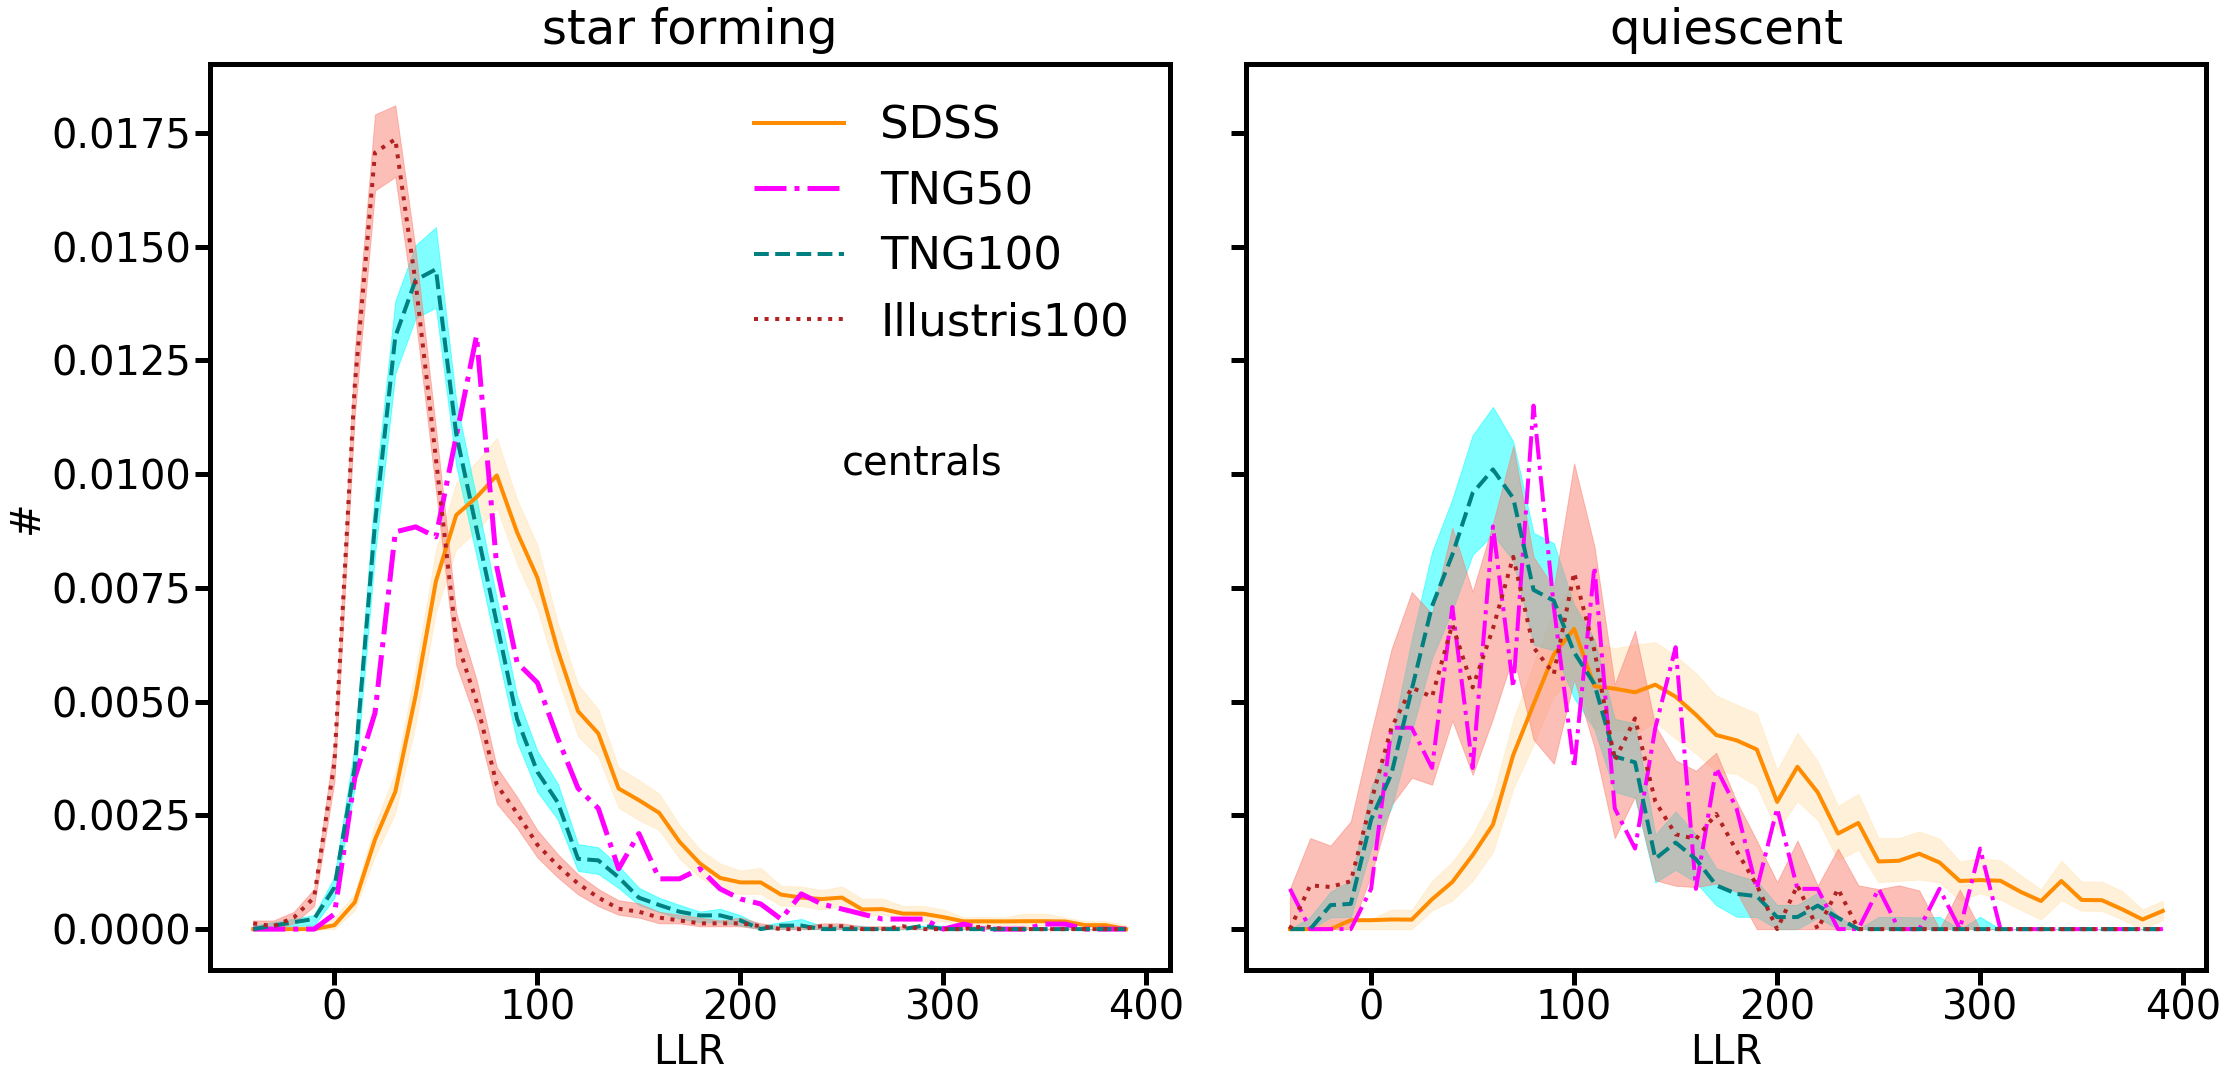

In [10]:

bins = np.arange(-50,400,10)

def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 1000
    n = len(dset2)
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up
    
    
fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))

for dset, (lab, col, facecol,ls) in zip([SDSS_cen,TNG50_cen,TNG_cen, Illustris_cen], zip(['SDSS','TNG50','TNG100','Illustris100'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up = make_bootstrap(dset, TNG50, choice='SF')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

        low,med,up = make_bootstrap(dset, TNG50, choice='Q')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
    else:
        h = np.histogram(TNG50_cen_SF['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        h = np.histogram(TNG50_cen_Q['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
    
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()
ax2.text(250,0.01, 'centrals')
fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_cen.pdf')

# for satellites only

### binning only in the region where SDSS and simulations coexist

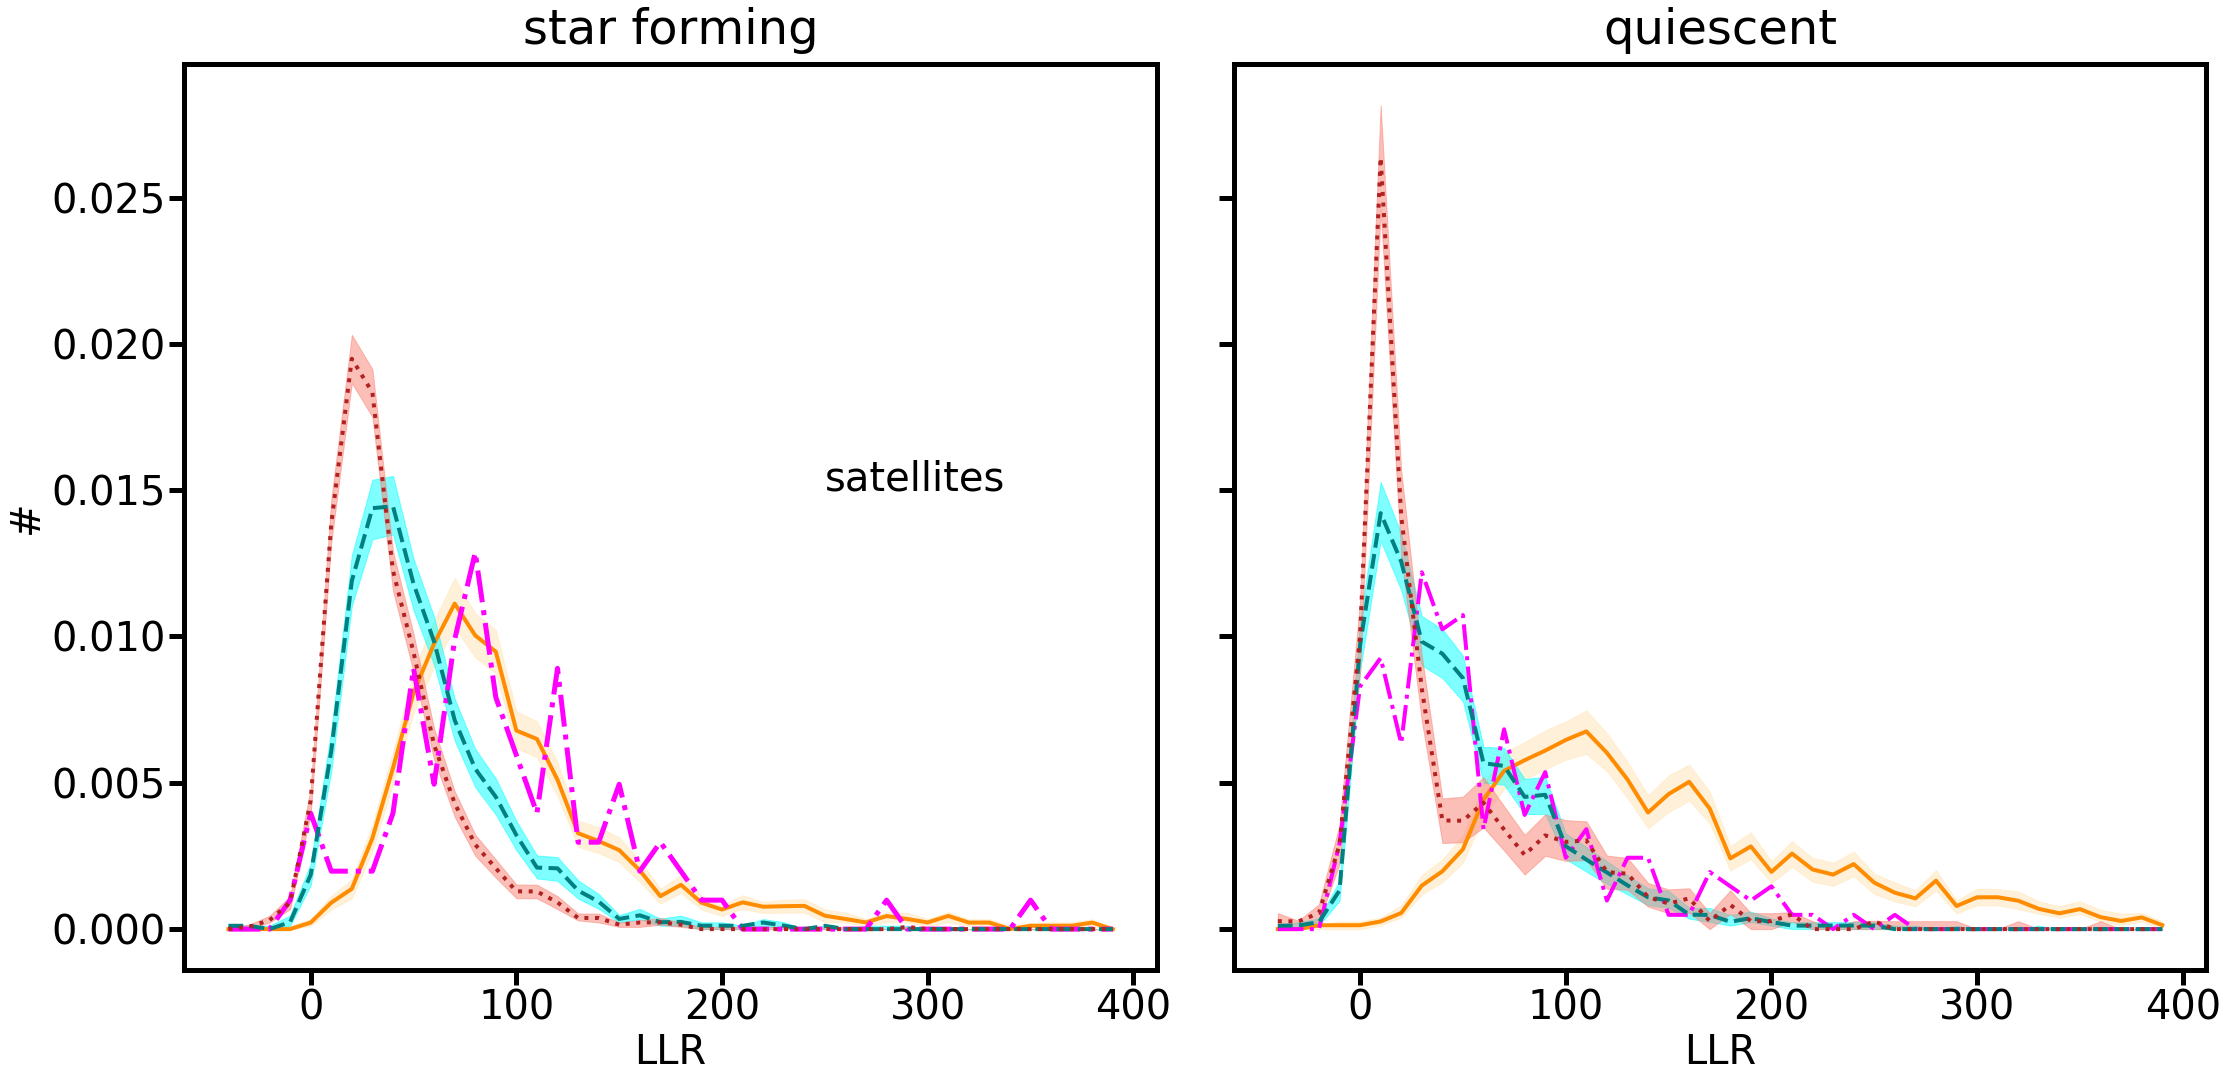

In [78]:
binsx = np.linspace(9.5,12,8)
binsy = np.linspace(-0.5,1.7,8)
stat_SDSS_Q, x,y,_ = binned_statistic_2d(SDSS_sat_Q['Mstar'],SDSS_sat_Q['$logR_e \ [arcsec]$'], values=SDSS_sat_Q['LLR'], statistic='mean',bins=[binsx,binsy])
stat_SDSS_Q = stat_SDSS_Q.T
stat_SDSS_SF, x,y,_ = binned_statistic_2d(SDSS_sat_SF['Mstar'],SDSS_sat_SF['$logR_e \ [arcsec]$'], values=SDSS_sat_SF['LLR'], statistic='mean',bins=[binsx,binsy])
stat_SDSS_SF = stat_SDSS_SF.T

binsx_ = binsx[1:]-0.5*(binsx[1]-binsx[0])
binsy_ = binsy[1:]-0.5*(binsy[1]-binsy[0])
TNG50_id = []
TNG_id = []
Illustris_id = []
for i,bx in enumerate(binsx_):
    for j, by in enumerate(binsy_):
        if not np.isnan(stat_SDSS_Q[i][j]):
            TNG50_id.extend(TNG50_sat_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            TNG_id.extend(TNG_sat_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            Illustris_id.extend(Illustris_sat_Q.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
        if not np.isnan(stat_SDSS_SF[i][j]):
            TNG50_id.extend(TNG50_sat_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            TNG_id.extend(TNG_sat_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
            Illustris_id.extend(Illustris_sat_SF.query('{}<Mstar<{} & {}<Re<{}'.format(binsx[i],binsx[i+1],binsy[j],binsy[j+1])).index.values)
        

TNG_sat_ = TNG_sat.loc[TNG_id]
TNG50_sat_ = TNG50_sat.loc[TNG50_id]
Illustris_sat_= Illustris_sat.loc[Illustris_id]
fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))

for dset, (lab, col, facecol,ls) in zip([SDSS_sat,TNG50_sat,TNG_sat, Illustris_sat], zip(['SDSS','TNG50','TNG100','Illustris100'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up = make_bootstrap(dset, TNG50, choice='SF')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

        low,med,up = make_bootstrap(dset, TNG50, choice='Q')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
    else:
        h = np.histogram(TNG50_sat_.query('sSFR>-11')['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        h = np.histogram(TNG50_sat_.query('sSFR<-11')['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
        
ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()
ax2.text(250,0.015, 'satellites')
fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_sat_onlyOnSDSSmanifold.pdf')

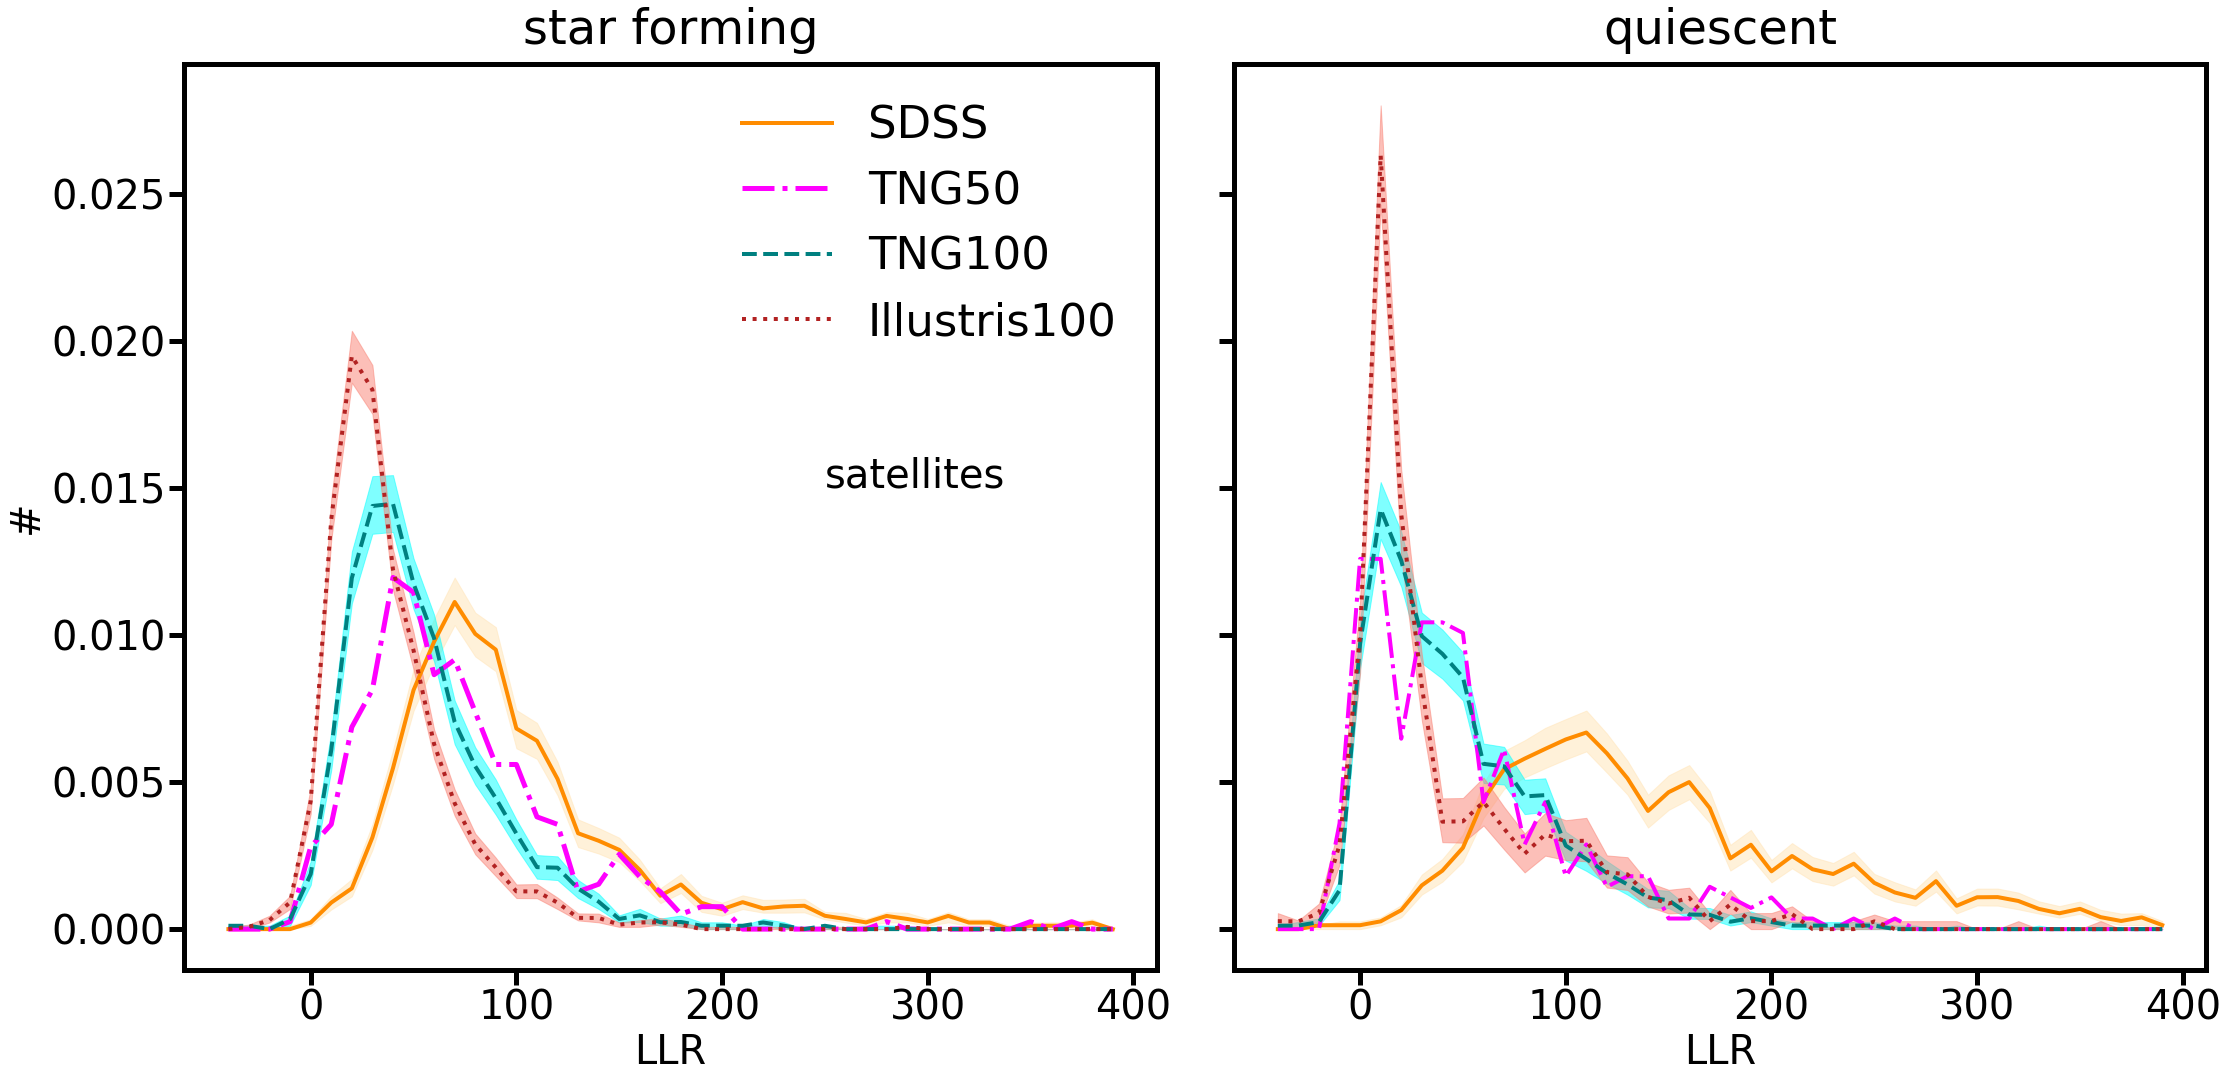

In [12]:
bins = np.arange(-50,400,10)

def make_bootstrap(dset, dset2, choice='SF'):
    Nboot = 1000
    n = len(dset2)
    LLR = []
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='SF':
            sample = sample.query('sSFR>-11')
        elif choice=='Q':
            sample = sample.query('sSFR<-11')
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up
    
    
fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))

for dset, (lab, col, facecol,ls) in zip([SDSS_sat,TNG50_sat,TNG_sat, Illustris_sat], zip(['SDSS','TNG50','TNG100','Illustris100'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up = make_bootstrap(dset, TNG50, choice='SF')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)

        low,med,up = make_bootstrap(dset, TNG50, choice='Q')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
    else:
        h = np.histogram(TNG50_sat_SF['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        h = np.histogram(TNG50_sat_Q['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
    
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title('star forming')
ax1.set_title('quiescent')
fig.tight_layout()
ax2.text(250,0.015, 'satellites')
fig.savefig('./results/LLR_L_trends/LLR_SF_Q_1sigma_sat.pdf')

# bins of stellar mass

-112.39
-106.95
-129.68
-96.54


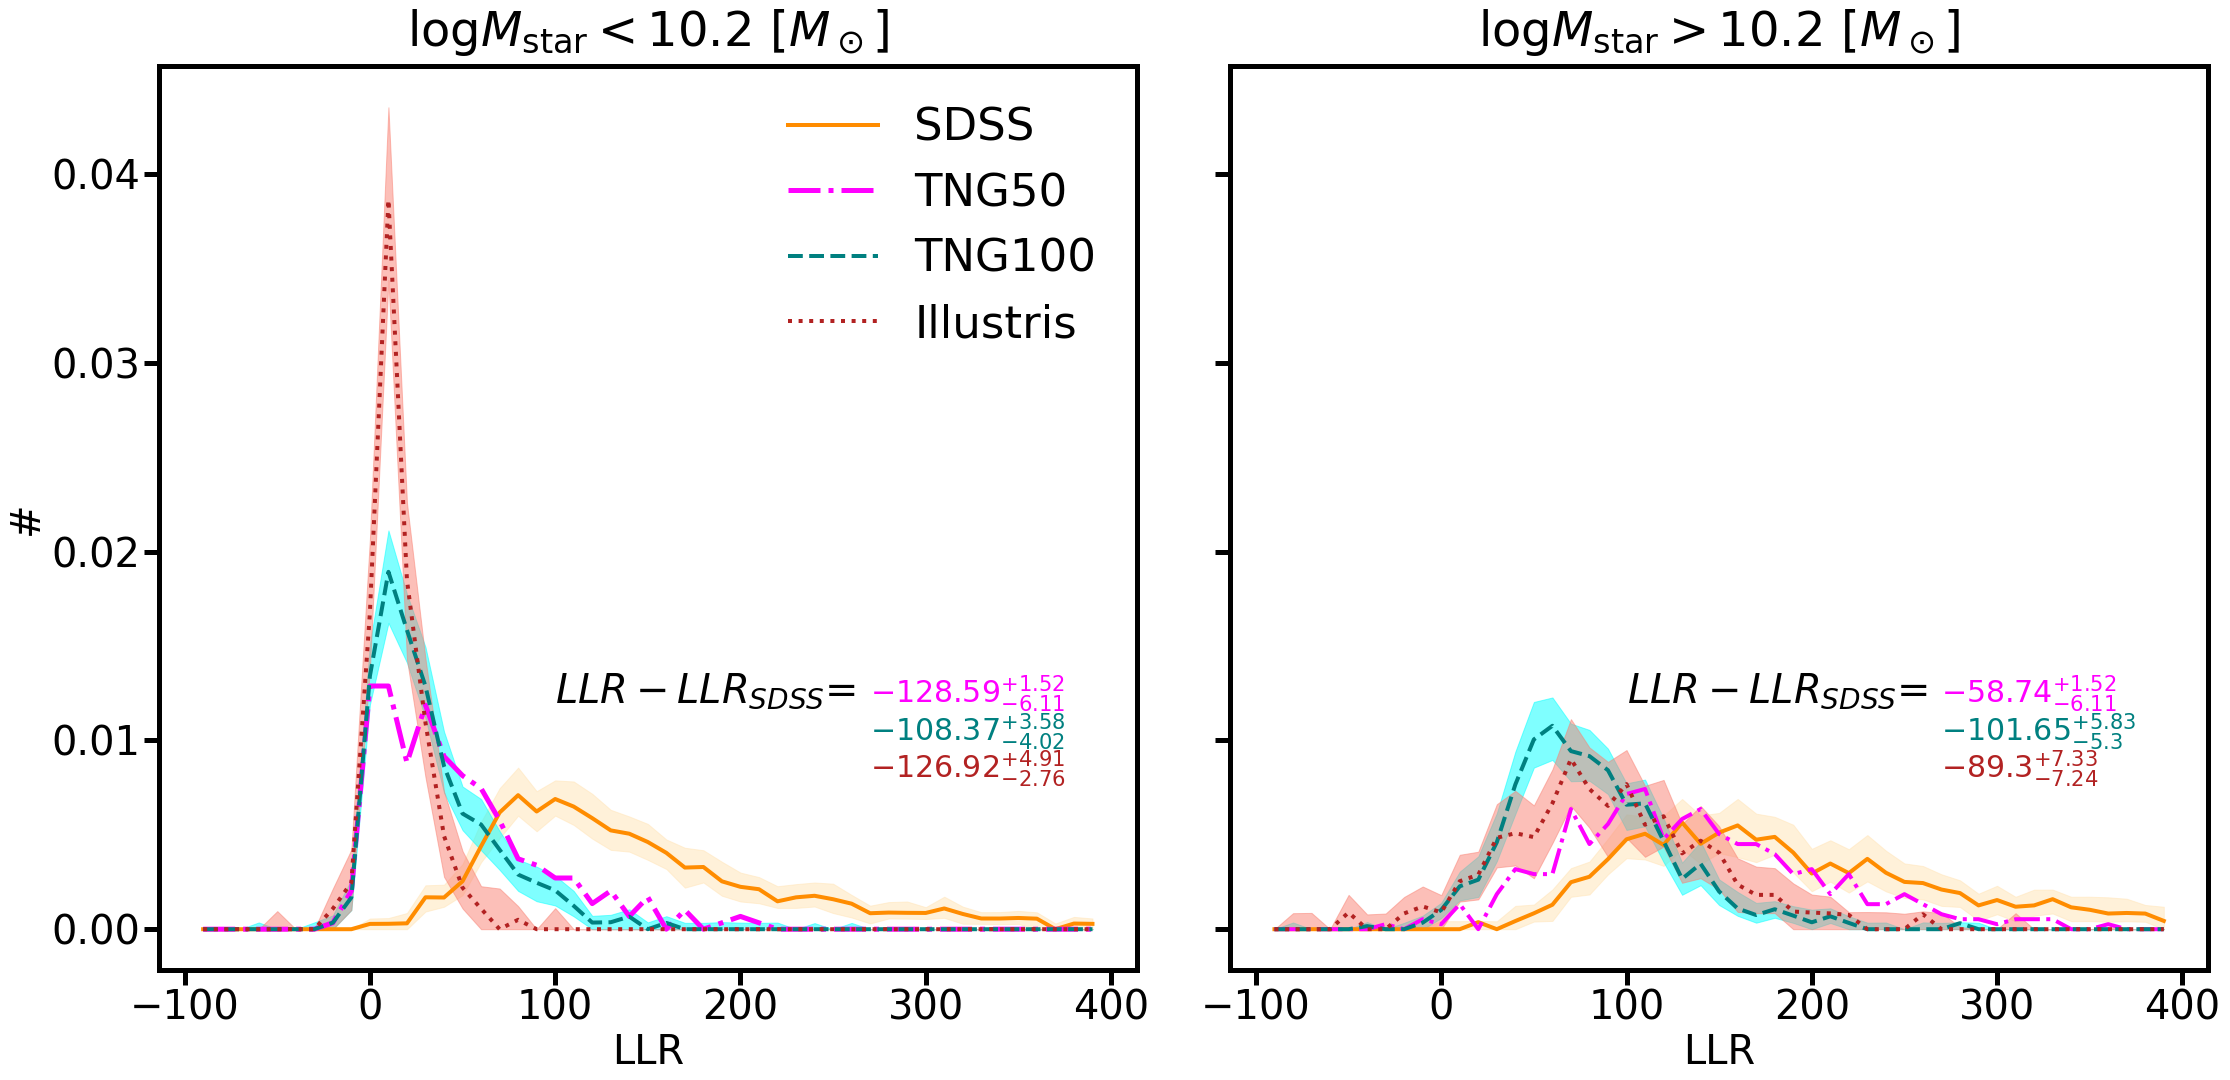

In [88]:

bins = np.arange(-100,400,10)

def make_bootstrap(dset, dset2, choice='lowmass'):
    Nboot = 100
    n = len(dset2)
    LLR = []
    boot_mean = [] 
    for i in range(Nboot):
        sample = dset.sample(n)
        if choice=='lowmass':
            sample = sample.query('Mstar<10.5 & sSFR<-11')
        elif choice=='highmass':
            sample = sample.query('Mstar>10.5 & sSFR<-11')
        elif choice=='all':
            pass
        LLR.append(np.histogram(sample['LLR'], bins=bins, density=True)[0])
        boot_mean.append(sample['LLR'].mean())
    low, med, up = np.percentile(np.array(LLR).T, [16,50,84], axis=1)
    return low, med,up, np.array(boot_mean)
    
    

fig, (ax2,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
ys = 0.012
ax1.text(100,ys,'$LLR-LLR_{SDSS}$=')
ax2.text(100,ys,'$LLR-LLR_{SDSS}$=')

for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
    if lab!='TNG50':
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='lowmass')
        ax2.plot(bins[1:],med, label=lab, color=col, lw=4, ls=ls)
        ax2.fill_between(bins[1:], up,low, color=facecol, alpha=0.5)
        if lab!='SDSS':
            boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS_lowmass,[16,50,84])
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            boot_low = np.round(boot_low,2)
            boot_med = np.round(boot_med,2)
            boot_up = np.round(boot_up,2)
            print(boot_low)
            ax2.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            #ax.text(300,ys,np.round(text,2),color=col)
        else:
            boot_mean_SDSS_lowmass = boot_mean.copy()
            
    
        low,med,up, boot_mean = make_bootstrap(dset, TNG50, choice='highmass')
        ax1.plot(bins[1:],med, label='SDSS', color=col, lw=4, ls=ls)
        ax1.fill_between(bins[1:], up,low, color=facecol, alpha=0.5 )
        
        if lab!='SDSS':
            boot_low, boot_med,boot_up = np.percentile(boot_mean-boot_mean_SDSS_highmass,[16,50,84])
          #  text = SDSS[SDSS['LLR']<500].LLR.mean()-dset['LLR'].mean()
            boot_low = np.round(boot_low,2)
            boot_med = np.round(boot_med,2)
            boot_up = np.round(boot_up,2)
            print(boot_low)
            ax1.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
           # ax2.text(300,ys,np.round(text,2),color=col)
            ys = ys -0.002
        else:
            
            boot_mean_SDSS_highmass = boot_mean.copy()
    

    else:
        h = np.histogram(TNG50_low.query('sSFR>-11')['LLR'],bins=bins, density=True)[0]
        ax2.plot(bins[1:],h,lw=5, color='magenta',label='TNG50',  ls='-.')
        
        if lab!='SDSS':
          #  text = SDSS_SF[SDSS_SF['LLR']<500].LLR.mean()-np.mean(TNG50_SF['LLR'])
            boot_low, boot_med,boot_up = np.percentile(TNG50_low.query('sSFR>-11')['LLR'].mean()-boot_mean_SDSS,[16,50,84])
            #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
            boot_low = np.round(boot_low,2)
            boot_med = np.round(boot_med,2)
            boot_up = np.round(boot_up,2)
            ax2.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            #ax2.text(300,ys,np.round(text,2),color=col)
        
        h = np.histogram(TNG50_high['LLR'],bins=bins, density=True)[0]
        ax1.plot(bins[1:], h,lw=4, color='magenta',  ls='-.')
        
        if lab!='SDSS':
         #   text = SDSS_Q[SDSS_Q['LLR']<500].LLR.mean()-np.mean(TNG50_Q['LLR'])
         #   ax1.text(300,ys,np.round(text,2),color=col)
            boot_low, boot_med,boot_up = np.percentile(TNG50_high.query('sSFR>-11')['LLR'].mean()-boot_mean_SDSS,[16,50,84])
            #text = SDSS[SDSS['LLR']<500].LLR.mean()-np.mean(TNG50['LLR'])
            boot_low = np.round(boot_low,2)
            boot_med = np.round(boot_med,2)
            boot_up = np.round(boot_up,2)
            ax1.text(270,ys,r"${}^{{+{}}}_{{-{}}}$".format(boot_med, np.round(boot_up-boot_med,2), np.round(boot_med-boot_low,2)),color=col, fontsize=30)
            ys = ys-0.002
        
#SDSS_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - Q', density=True, ax=ax1)
#TNG50_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - Q', density=True, ax=ax1)
###TNG_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - Q', density=True, ax=ax1)
#I#llustris_Q['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - Q', ax=ax1 ,density=True)

#SDSS_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='darkorange',label='SDSS - SF', density=True, ax=ax2)
#TNG50_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='magenta',label='TNG50 - SF', density=True, ax=ax2)
#TNG_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='teal',label='TNG100 - SF', density=True, ax=ax2)
#Illustris_SF['LLR'].hist(bins=bins, histtype='step',lw=4, color='firebrick',label='Illustris100 - SF', ax=ax2 ,density=True) 

#ax1.legend(frameon=False, fontsize=45)
ax2.legend(frameon=False, fontsize=45)

ax1.set_xlabel('LLR')
ax2.set_xlabel('LLR')
ax2.set_ylabel('#')
ax2.set_title(r'$\log{M_{\rm star}}<10.2 \ [M_\odot]$')
ax1.set_title(r'$\log{M_{\rm star}}>10.2 \ [M_\odot]$')
fig.tight_layout()

fig.savefig('./results/LLR_L_trends/LLR_highmass_lowmass_1sigma.pdf')

In [94]:
a = SDSS_cen_Q[SDSS_cen_Q['LLR']<500].LLR.mean()-Illustris_cen_Q[Illustris_cen_Q['LLR']<500].LLR.mean()
b = SDSS_cen_Q[SDSS_cen_Q['LLR']<500].LLR.mean()-TNG_cen_Q[TNG_cen_Q['LLR']<500].LLR.mean()
c = SDSS_cen_Q[SDSS_cen_Q['LLR']<500].LLR.mean()-TNG50_cen_Q[TNG50_cen_Q['LLR']<500].LLR.mean()
print(a,b,c)

89.38013423010248 94.80941627020883 70.65889410883082


In [96]:
a = SDSS_sat_Q[SDSS_sat_Q['LLR']<500].LLR.mean()-Illustris_sat_Q[Illustris_sat_Q['LLR']<500].LLR.mean()
b = SDSS_sat_Q[SDSS_sat_Q['LLR']<500].LLR.mean()-TNG_sat_Q[TNG_sat_Q['LLR']<500].LLR.mean()
c = SDSS_sat_Q[SDSS_sat_Q['LLR']<500].LLR.mean()-TNG50_sat_Q[TNG50_sat_Q['LLR']<500].LLR.mean()
a,b,c

(108.82541245834477, 104.87368185057383, 99.84618998917728)

In [97]:
a = SDSS_cen_SF[SDSS_cen_SF['LLR']<500].LLR.mean()-Illustris_cen_SF[Illustris_cen_SF['LLR']<500].LLR.mean()
b = SDSS_cen_SF[SDSS_cen_SF['LLR']<500].LLR.mean()-TNG_cen_SF[TNG_cen_SF['LLR']<500].LLR.mean()
c = SDSS_cen_SF[SDSS_cen_SF['LLR']<500].LLR.mean()-TNG50_cen_SF[TNG50_cen_SF['LLR']<500].LLR.mean()
print(a,b,c)

61.95838976387743 45.978859123548176 23.904280071689683


In [98]:
a = SDSS_sat_SF[SDSS_sat_SF['LLR']<500].LLR.mean()-Illustris_sat_SF[Illustris_sat_SF['LLR']<500].LLR.mean()
b = SDSS_sat_SF[SDSS_sat_SF['LLR']<500].LLR.mean()-TNG_sat_SF[TNG_sat_SF['LLR']<500].LLR.mean()
c = SDSS_sat_SF[SDSS_sat_SF['LLR']<500].LLR.mean()-TNG50_sat_SF[TNG50_sat_SF['LLR']<500].LLR.mean()
a,b,c

(63.046075316270894, 47.57051408899842, 31.18429930258921)

# likelihood distributions 

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


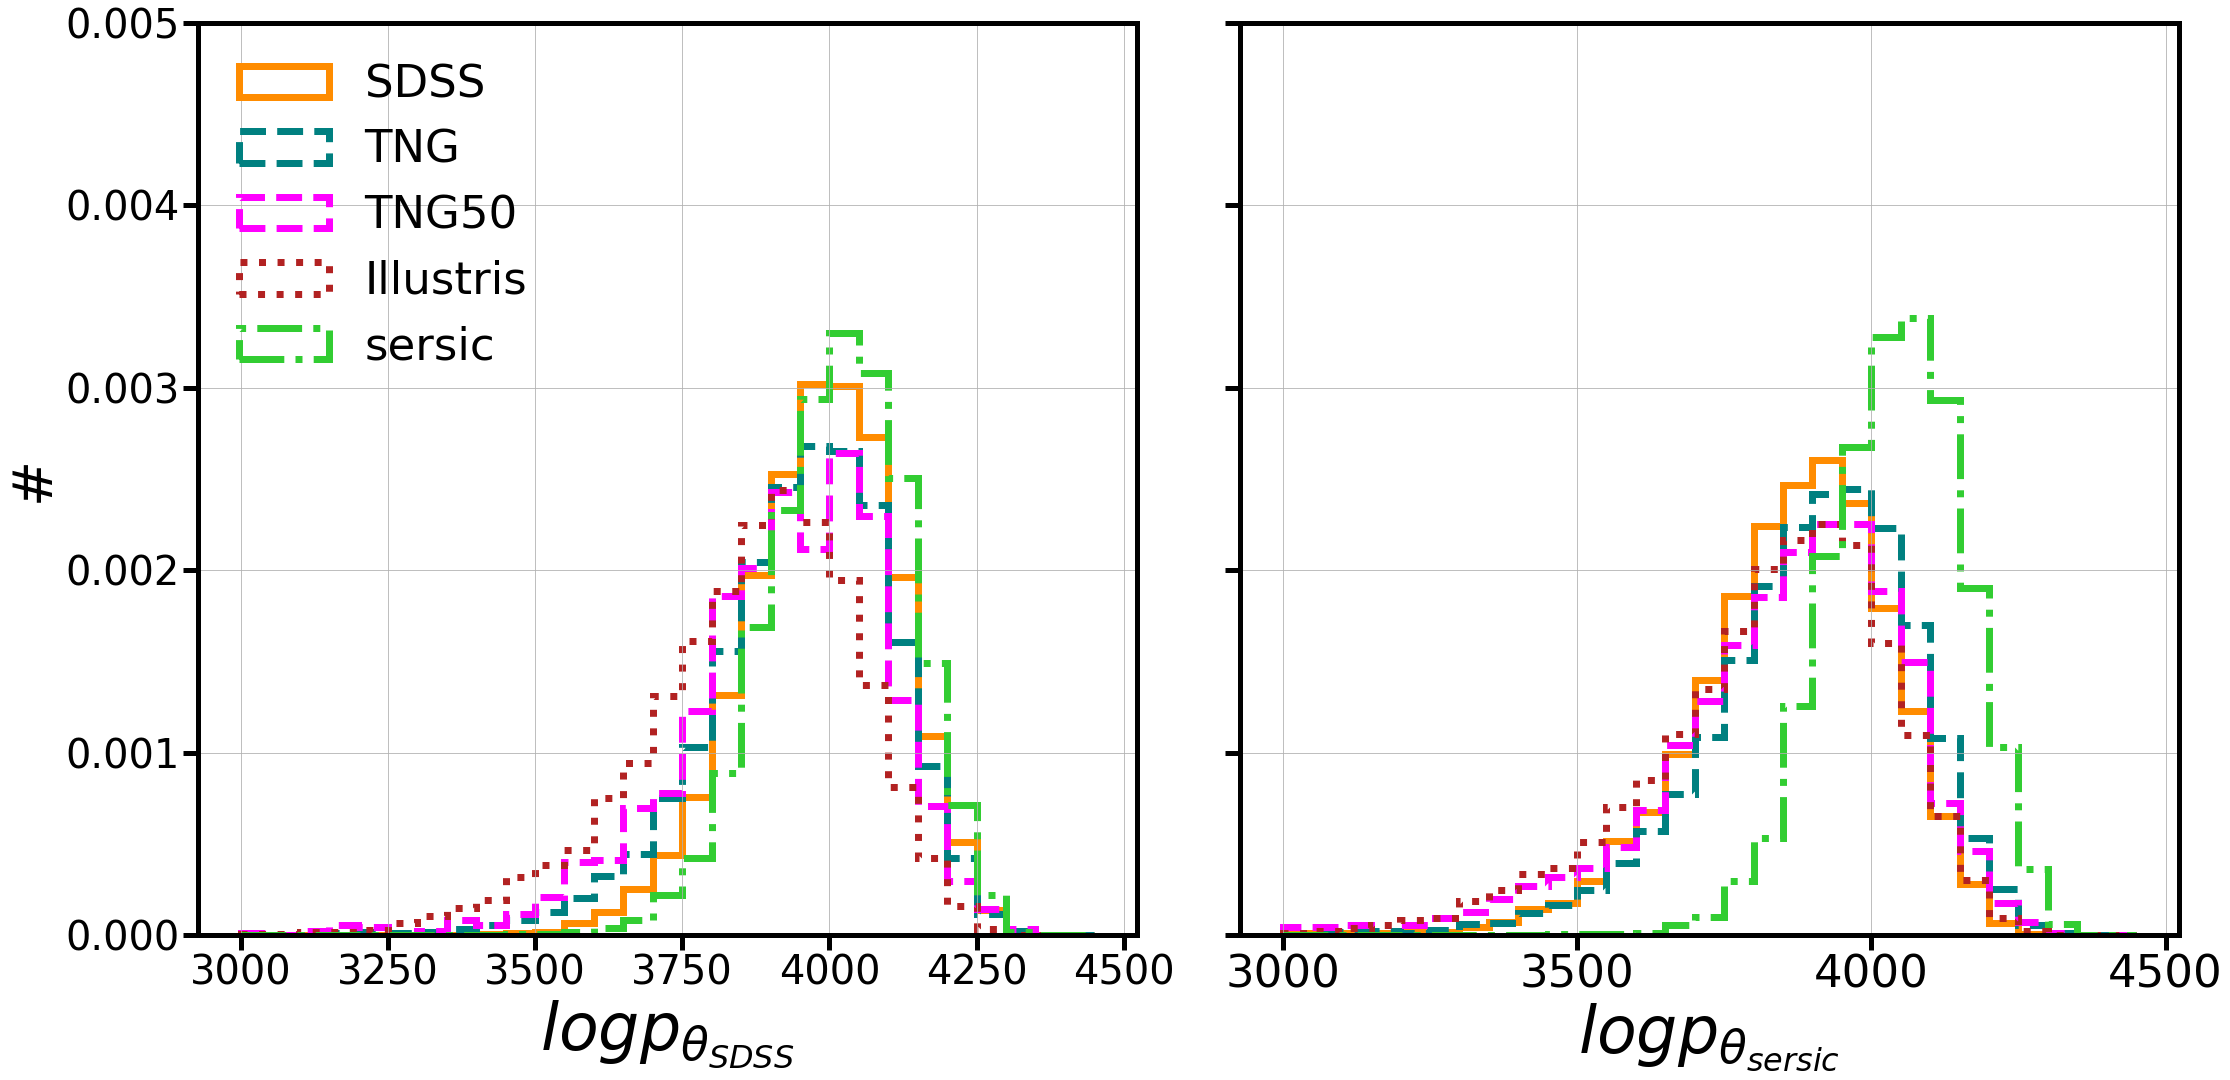

In [146]:
fig,(ax,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
#ax.grid(which='both',axis='both',linewidth=3, color='darkgray')
bins = np.arange(3000,4500,50)
#SDSS_train['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='SDSS - train', color='black', lw=7, density=True)

SDSS['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='SDSS', color='darkorange', lw=7, density=True)

TNG['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='TNG', color='teal', lw=7, ls='--', density=True)

TNG50['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='TNG50', color='magenta', lw=7, ls='--', density=True)
Illustris['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='Illustris', color='firebrick', lw=7, ls=':', density=True)
blobs['likelihood'].hist( bins=bins, ax=ax, color='limegreen', lw=7,label='sersic', histtype='step', normed=True, ls='-.')
#SDSS_train['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='SDSS - train', color='black', lw=3, density=True)

#sky['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='sky', color='deeppink', lw=7, ls='-.', density=True)
#sky_norot['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='sky, no rotation', color='gold', lw=2, ls='--', density=True)

SDSS['likelihood_shuffled'].hist(bins=bins,ax=ax1, histtype='step', label='SDSS', color='darkorange', lw=7, density=True)

TNG['likelihood_shuffled'].hist(bins=bins,ax=ax1, histtype='step', label='TNG', color='teal', lw=7, ls='--', density=True)

TNG50['likelihood_shuffled'].hist(bins=bins,ax=ax1, histtype='step', label='TNG50', color='magenta', lw=7, ls='--', density=True)
Illustris['likelihood_shuffled'].hist(bins=bins,ax=ax1, histtype='step', label='Illustris', color='firebrick', lw=7, ls=':', density=True)
blobs['likelihood_shuffled'].hist( bins=bins, ax=ax1, color='limegreen', lw=7,label='sersic', histtype='step', normed=True, ls='-.')


ax.legend(fontsize=45, frameon=False, loc='upper left')

ax.set_ylim(0,0.005)
plt.tick_params(labelsize=45)
ax.set_xlabel(r'$log p_{\theta_{SDSS}}$',fontsize=65)
ax1.set_xlabel(r'$log p_{\theta_{sersic}}$',fontsize=65)
ax.set_ylabel('#', fontsize=55)
plt.tight_layout()
plt.savefig('./results/likelihood_plots/tests/likelihood-paper.pdf')


In [148]:
fig,(ax,ax1) = plt.subplots(1,2, sharey=True, figsize=(32,16))
#ax.grid(which='both',axis='both',linewidth=3, color='darkgray')
bins = np.arange(3000,4500,50)

SDSS_train['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='SDSS - train', color='black', lw=7, density=True)
SDSS['likelihood'].hist(bins=bins,ax=ax, histtype='step', label='SDSS - test', color='darkorange', lw=7, density=True)

blobs_train['likelihood_shuffled'].hist( bins=bins, ax=ax1, color='black', lw=7,label='sersic - train', histtype='step', normed=True, ls='-.')
blobs['likelihood_shuffled'].hist( bins=bins, ax=ax1, color='limegreen', lw=7,label='sersic - test', histtype='step', normed=True, ls='-.')

ax.legend(fontsize=45, frameon=False, loc='upper left')
ax1.legend(fontsize=45, frameon=False, loc='upper left')

ax.set_ylim(0,0.005)
plt.tick_params(labelsize=45)
ax.set_xlabel(r'$log p_{\theta_{SDSS}}$',fontsize=65)
ax1.set_xlabel(r'$log p_{\theta_{sersic}}$',fontsize=65)
ax.set_ylabel('#', fontsize=55)
plt.tight_layout()
plt.savefig('./results/likelihood_plots/tests/likelihood-paper-training.pdf')


/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
